In [2]:

import pandas as pd
import utils
import importlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
importlib.reload(utils)

<module 'utils' from '/Users/vittoriameroni/Downloads/utils.py'>

In [3]:
beers_adv = pd.read_csv("data/birre/BeerAdvocate/beers.csv", sep=",")
breweries_adv = pd.read_csv("data/birre/BeerAdvocate/breweries.csv", sep=",")
users_adv = pd.read_csv("data/birre/BeerAdvocate/users.csv", sep=",")

In [6]:
utils.ensure_col_types(beers_adv,
                       ['beer_id', 'brewery_id', 'nbr_ratings', 'nbr_reviews', 'nbr_matched_valid_ratings'],
                       ['abv'],
                       ['beer_name', 'brewery_name', 'style'])

In [8]:
beers_adv.head()

beer_id           beer_name  brewery_id            brewery_name  \
0   166064    Nashe Moskovskoe       39912  Abdysh-Ata (Абдыш Ата)   
1   166065     Nashe Pivovskoe       39912  Abdysh-Ata (Абдыш Ата)   
2   166066  Nashe Shakhterskoe       39912  Abdysh-Ata (Абдыш Ата)   
3   166067  Nashe Zhigulevskoe       39912  Abdysh-Ata (Абдыш Ата)   
4   166063              Zhivoe       39912  Abdysh-Ata (Абдыш Ата)   

             style  nbr_ratings  nbr_reviews  avg  ba_score  bros_score  abv  \
0  Euro Pale Lager            0            0  NaN       NaN         NaN  4.7   
1  Euro Pale Lager            0            0  NaN       NaN         NaN  3.8   
2  Euro Pale Lager            0            0  NaN       NaN         NaN  4.8   
3  Euro Pale Lager            0            0  NaN       NaN         NaN  4.0   
4  Euro Pale Lager            0            0  NaN       NaN         NaN  4.5   

   avg_computed  zscore  nbr_matched_valid_ratings  avg_matched_valid_ratings  
0           NaN     NaN                          0                        NaN  
1           NaN     NaN                          0                        NaN  
2           NaN     NaN                          0                        NaN  
3           NaN     NaN                          0                        NaN  
4           NaN     NaN                          0                        NaN

Keep only beers that have atleast one review and one rating. Only beers that have been tried are wanted

In [13]:
beers_adv_filt = beers_adv[(beers_adv['nbr_ratings'] != 0) & (beers_adv['nbr_reviews'] != 0)].copy()

In [15]:
beers_adv_filt['nbr_ratings'].describe()

count    166649.000000
mean         49.216653
std         298.336124
min           1.000000
25%           2.000000
50%           5.000000
75%          17.000000
max       16509.000000
Name: nbr_ratings, dtype: float64

In [17]:
beers_adv_filt['nbr_reviews'].describe()

count    166649.000000
mean         15.539163
std          88.846266
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        3899.000000
Name: nbr_reviews, dtype: float64

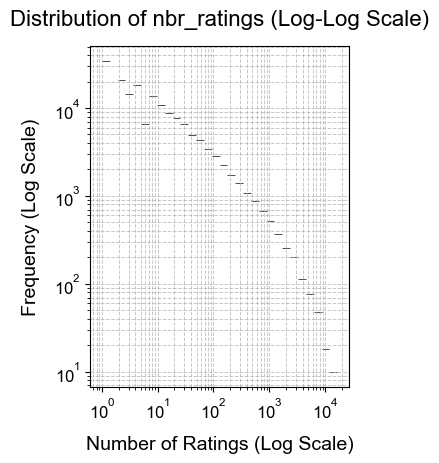

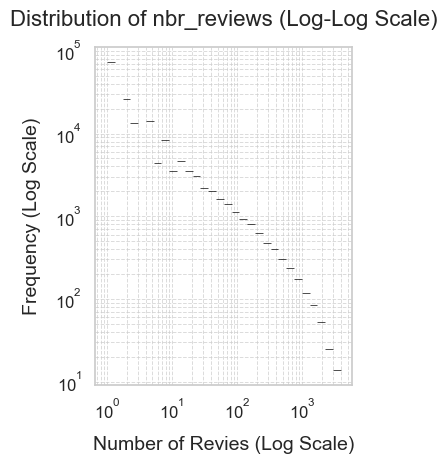

In [19]:
plt.subplot(121)
sns.set_theme(style="whitegrid")
sns.histplot(beers_adv_filt['nbr_ratings'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Ratings (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_ratings (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

plt.subplot(122)
sns.set_theme(style="whitegrid")
sns.histplot(beers_adv_filt['nbr_reviews'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Revies (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_reviews (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

Duplicates dealing:

In [22]:
print(beers_adv_filt['beer_id'].duplicated().any())

duplicates = beers_adv_filt['beer_id'].duplicated()
duplicates.describe()

False


count     166649
unique         1
top        False
freq      166649
Name: beer_id, dtype: object

In [24]:
duplicated_beer_id_rows = beers_adv_filt[beers_adv_filt['beer_id'].duplicated(keep=False)]
duplicated_beer_id_rows.head()

Empty DataFrame
Columns: [beer_id, beer_name, brewery_id, brewery_name, style, nbr_ratings, nbr_reviews, avg, ba_score, bros_score, abv, avg_computed, zscore, nbr_matched_valid_ratings, avg_matched_valid_ratings]
Index: []

Once seen that duplications are repeated entries they can be removed easily:

In [27]:
beers_adv_filt_unique = beers_adv_filt.drop_duplicates(subset='beer_id', keep='first').reset_index(drop=True)

utils.dataset_information(beers_adv_filt_unique, "Filtered + Unique Beers_BA")



########################################################
We are starting analysing dataset Filtered + Unique Beers_BA
- Dimension of starting dataset: (166649, 15)
- Columns of dataset:  Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    beer_id           beer_name  brewery_id  \
0   142544               Régab       37262   
1    19590       Barelegs Brew       10093   
2    19827            Legbiter       10093   
3    20841   St. Patrick's Ale       10093   
4    20842  St. Patrick's Best       10093   

                                brewery_name             style  nbr_ratings  \
0  Societe des Brasseries du Gabon (SOBRAGA)   Euro Pale Lager         

In [29]:
beers_adv_filt_unique['beer_id'].duplicated().describe()

count     166649
unique         1
top        False
freq      166649
Name: beer_id, dtype: object

### Breweries

In [32]:
utils.dataset_information(breweries_adv, "Breweries_BA")



########################################################
We are starting analysing dataset Breweries_BA
- Dimension of starting dataset: (16758, 4)
- Columns of dataset:  Index(['id', 'location', 'name', 'nbr_beers'], dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: False
Head: 
       id    location                    name  nbr_beers
0  39912  Kyrgyzstan  Abdysh-Ata (Абдыш Ата)          5
1  39913  Kyrgyzstan             Arpa (АРПА)          1
2  39914  Kyrgyzstan               Bear Beer          4
3  39915  Kyrgyzstan             Blonder Pub          4
4  39916  Kyrgyzstan            Kellers Bier          2


In [34]:
breweries_adv['nbr_beers'].describe()

count    16758.000000
mean        21.056331
std         69.417841
min          0.000000
25%          2.000000
50%          6.000000
75%         18.000000
max       1196.000000
Name: nbr_beers, dtype: float64

Drop breweries with null `nbr_beers`:

In [37]:
breweries_adv_filt = breweries_adv[(breweries_adv['nbr_beers'] != 0)].copy()
breweries_adv_filt['nbr_beers'].describe()

count    14522.000000
mean        24.298444
std         74.041044
min          1.000000
25%          3.000000
50%          8.000000
75%         21.000000
max       1196.000000
Name: nbr_beers, dtype: float64

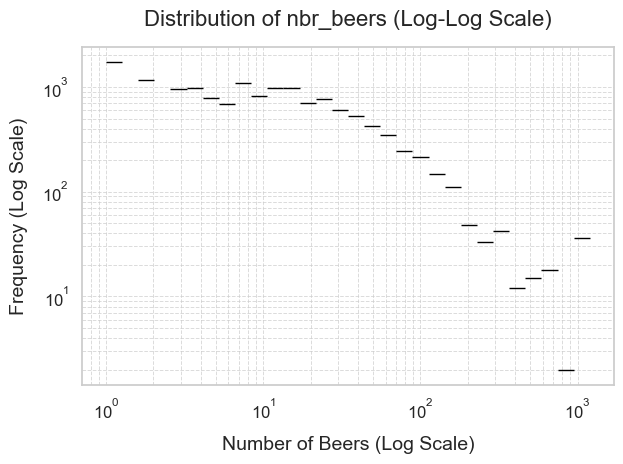

In [39]:
sns.set_theme(style="whitegrid")
sns.histplot(breweries_adv_filt['nbr_beers'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Beers (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_beers (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

Location analysis:

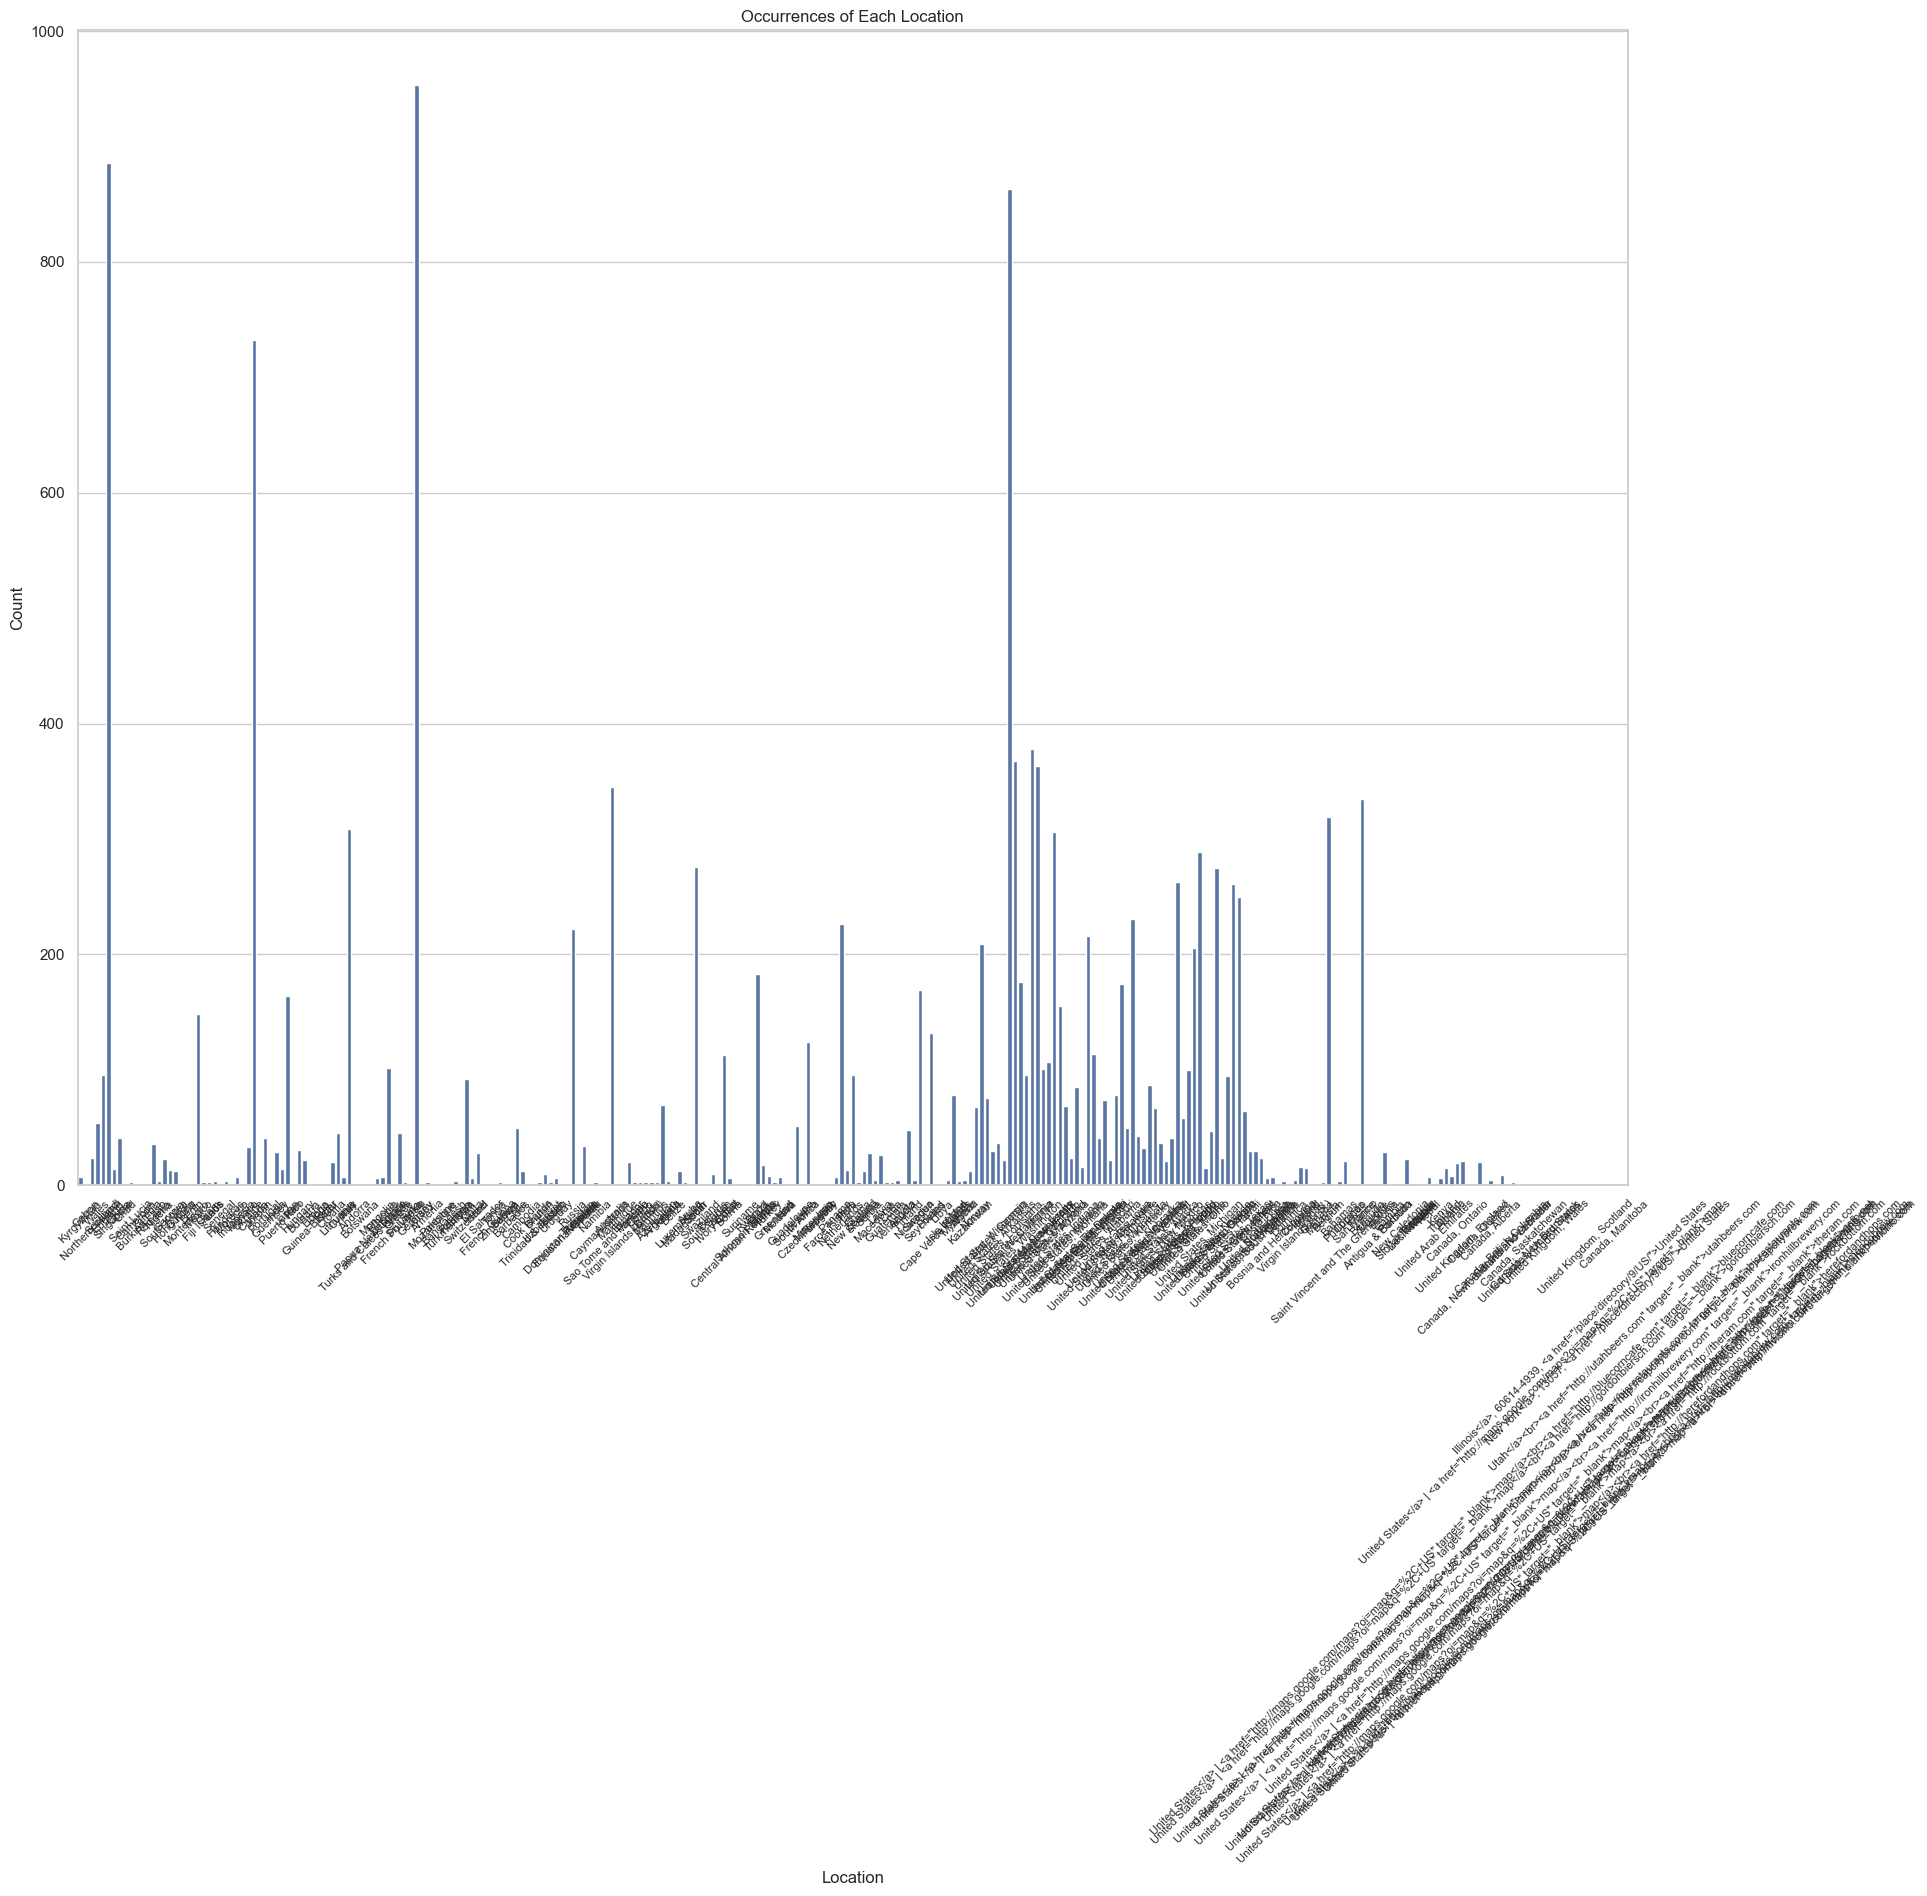

In [42]:
plt.figure(figsize=(20, 15))
sns.countplot(data=breweries_adv_filt, x='location')
plt.title('Occurrences of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8) 
plt.show()

Eliminate links added

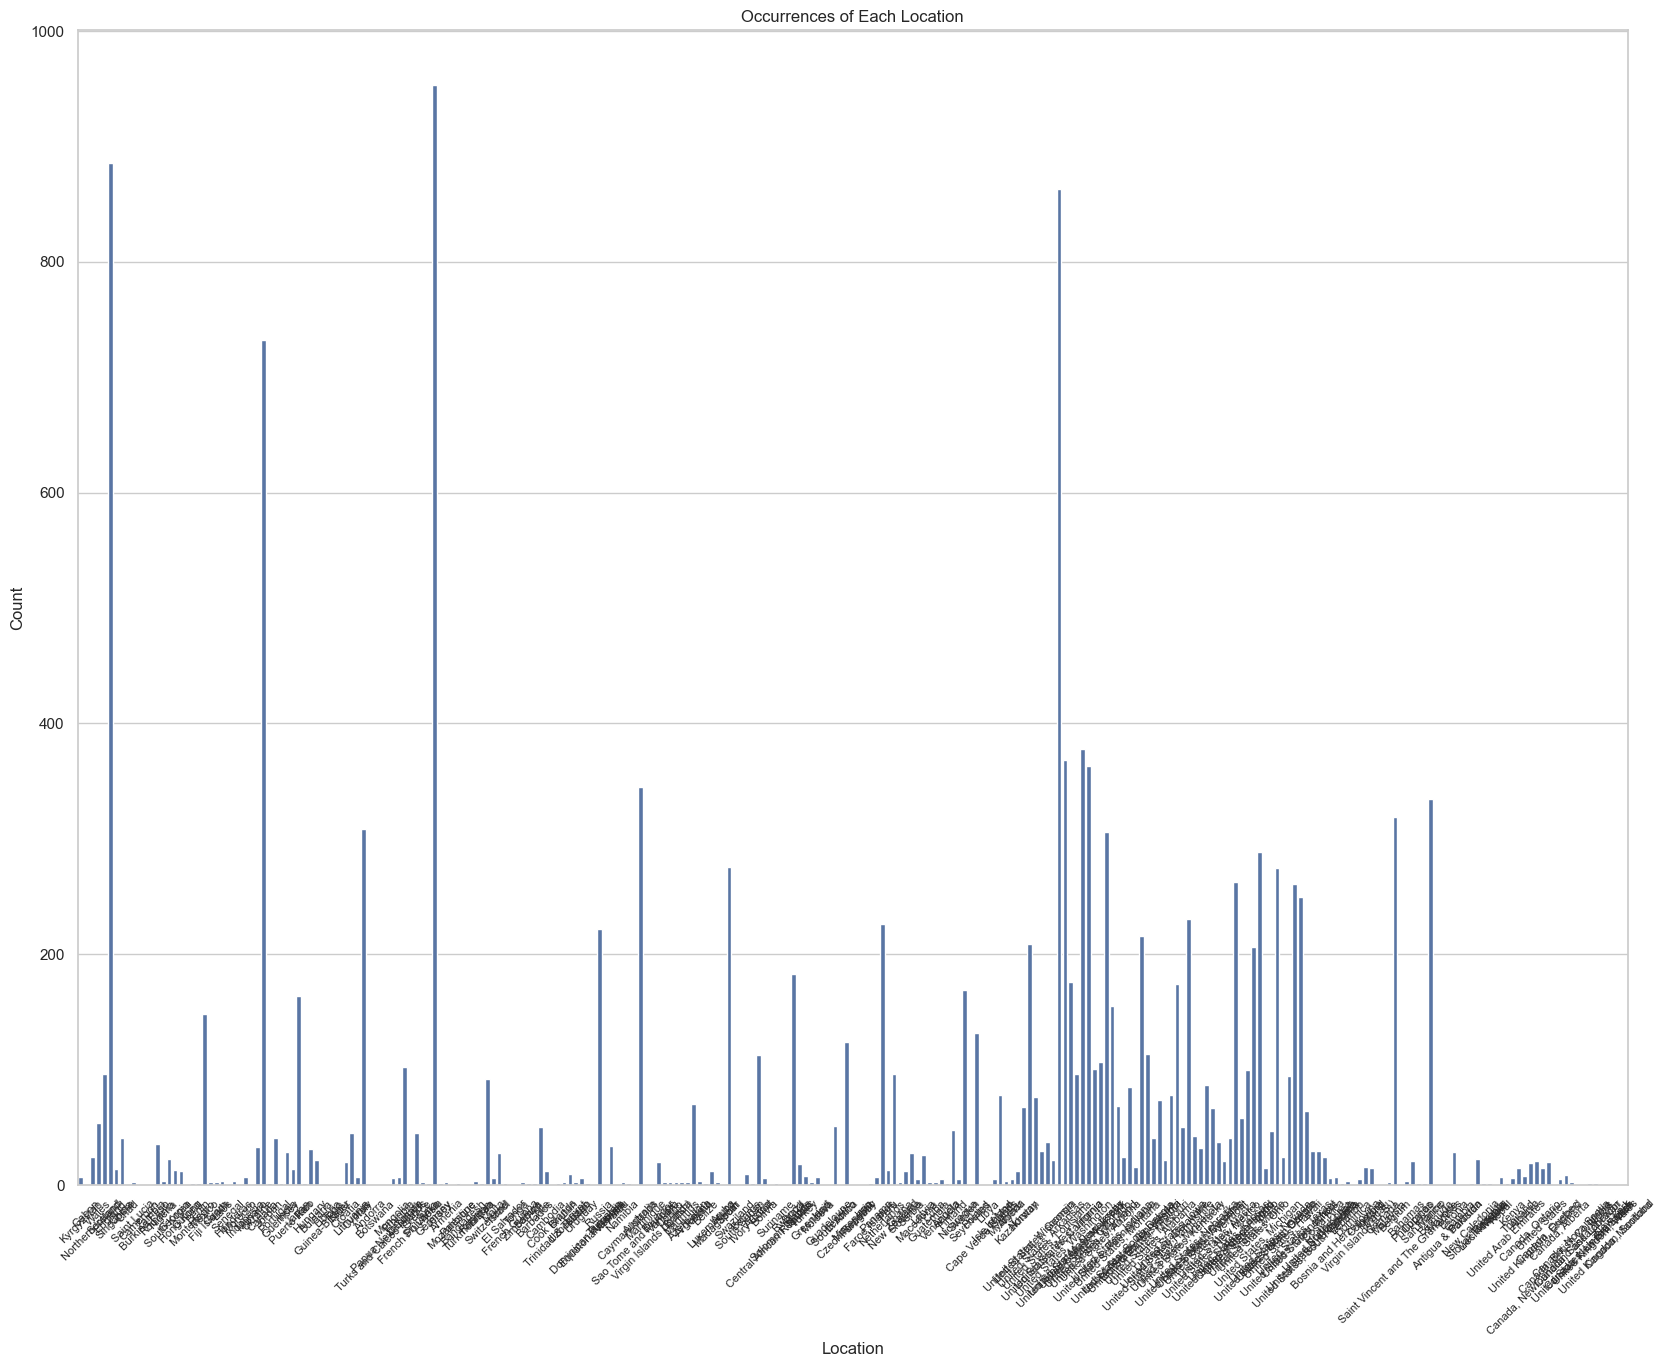

In [45]:
breweries_adv_filt['link'] = breweries_adv_filt['location'].str.contains("href", case=False, na=False)
breweries_adv_filt.loc[breweries_adv_filt['link'] == True, 'location'] = breweries_adv_filt['location'].str.split('<').str[0]
plt.figure(figsize=(20, 15))
sns.countplot(data=breweries_adv_filt, x='location')
plt.title('Occurrences of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8) 
plt.show()

Lets start by dividing the locations regions ",":

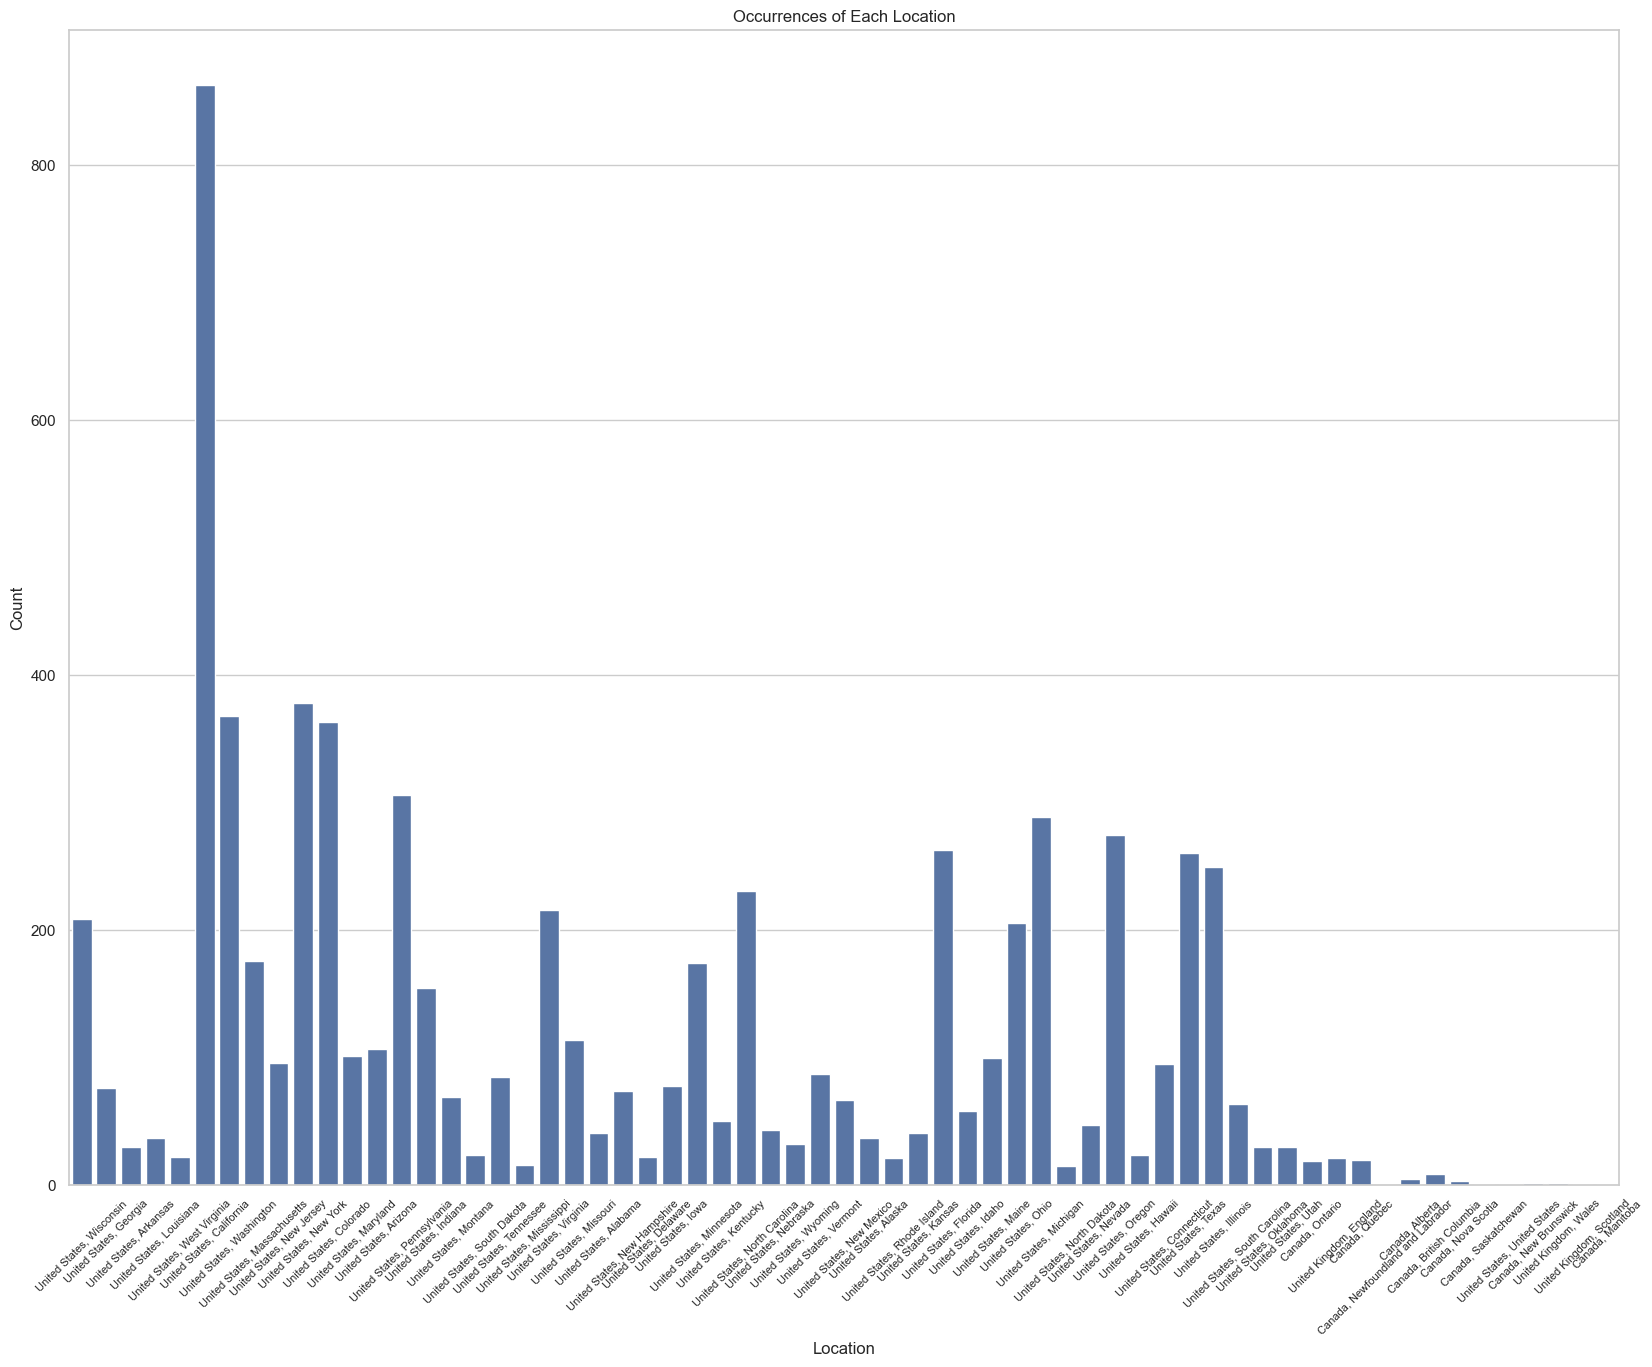

In [48]:
breweries_adv_filt['Regions'] = breweries_adv_filt['location'].str.contains(r"[,\|<]", case=False, na=False)

plt.figure(figsize=(20, 15))
sns.countplot(data=breweries_adv_filt[breweries_adv_filt['Regions'] == True], x='location')
plt.title('Occurrences of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8) 
plt.show()

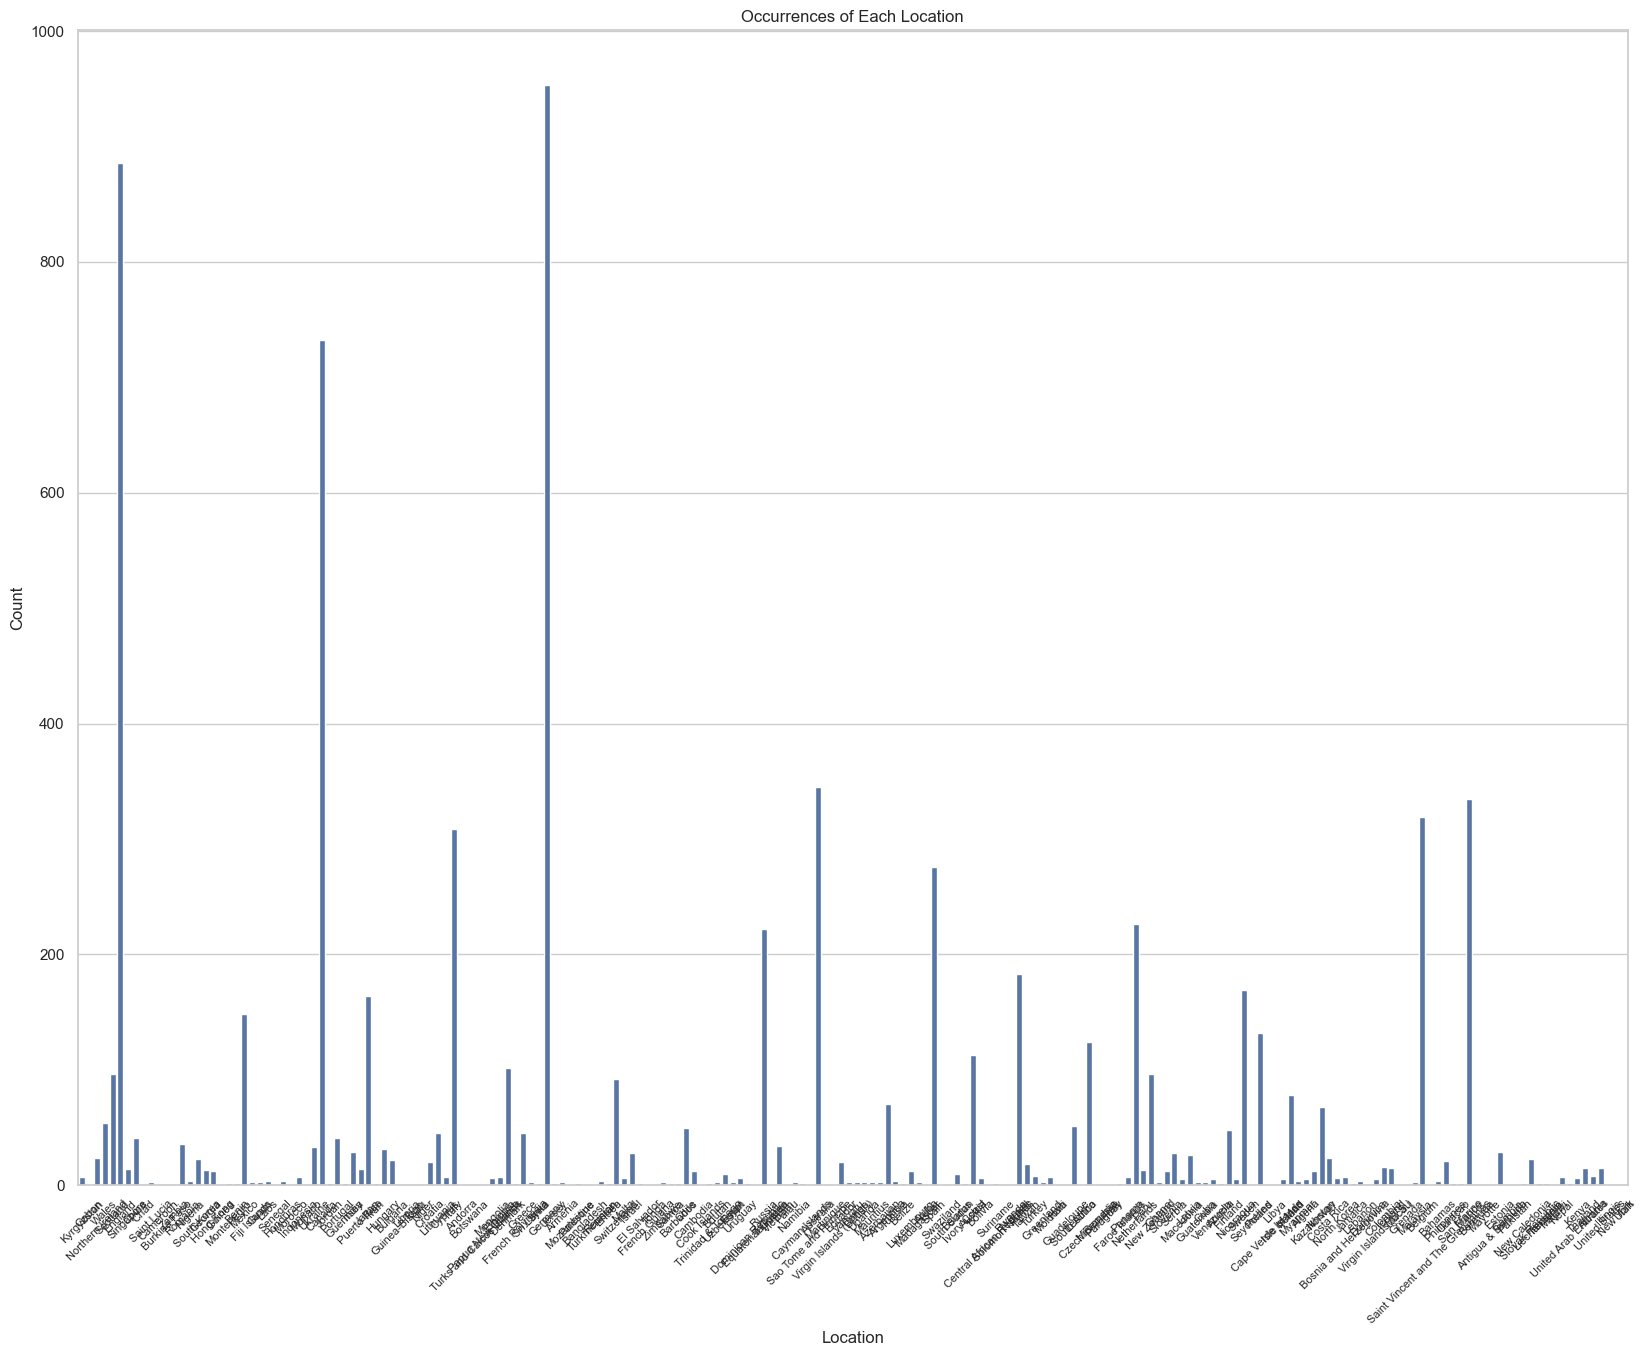

In [49]:
plt.figure(figsize=(20, 15))
sns.countplot(data=breweries_adv_filt[breweries_adv_filt['Regions'] == False], x='location')
plt.title('Occurrences of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8) 
plt.show()

Lest divide US, Canada and UK into location and region:

In [52]:
breweries_adv_filt[['location', 'location_region']] = breweries_adv_filt['location'].str.split(',', n=1, expand=True)

breweries_adv_filt['location'] = breweries_adv_filt['location'].str.strip()
breweries_adv_filt['location_region'] = breweries_adv_filt['location_region'].str.strip()

breweries_adv_filt[breweries_adv_filt['Regions']].head()

id       location                          name  nbr_beers   link  \
7986  49595  United States  Copper State Brewing Company          7  False   
7987   5522  United States                    Corner Pub         13  False   
7988   4834  United States           Courthouse Pub, The         13  False   
7989    939  United States     Cross Plains Beer Company          3  False   
7990  21405  United States               Dave's BrewFarm         90  False   

      Regions location_region  
7986     True       Wisconsin  
7987     True       Wisconsin  
7988     True       Wisconsin  
7989     True       Wisconsin  
7990     True       Wisconsin

In [55]:
breweries_adv_filt['US'] = breweries_adv_filt['location'].str.contains("United States", case=False, na=False)
breweries_adv_filt['UK'] = breweries_adv_filt['location'].str.contains("United Kingdom", case=False, na=False)
breweries_adv_filt['Canada'] = breweries_adv_filt['location'].str.contains("Canada", case=False, na=False)

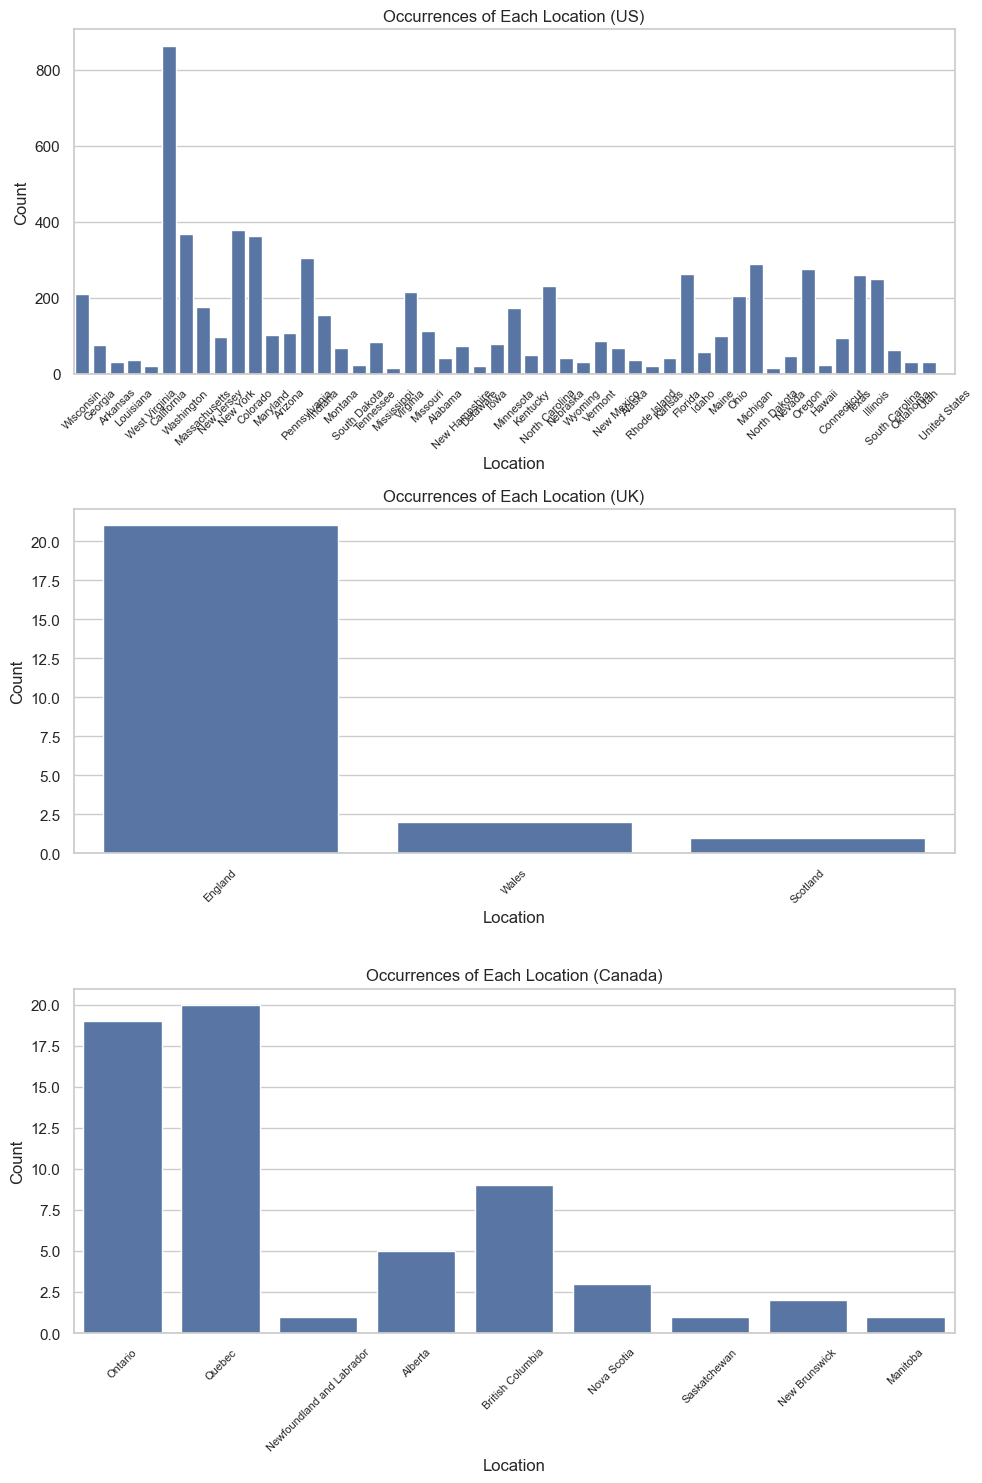

In [57]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.countplot(data=breweries_adv_filt[breweries_adv_filt['US'] == True], x='location_region', ax=axes[0])
axes[0].set_title('Occurrences of Each Location (US)')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45, labelsize=8)

sns.countplot(data=breweries_adv_filt[breweries_adv_filt['UK'] == True], x='location_region', ax=axes[1])
axes[1].set_title('Occurrences of Each Location (UK)')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45, labelsize=8)

sns.countplot(data=breweries_adv_filt[breweries_adv_filt['Canada'] == True], x='location_region', ax=axes[2])
axes[2].set_title('Occurrences of Each Location (Canada)')
axes[2].set_xlabel('Location')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()


In [58]:
breweries_adv_filt.loc[breweries_adv_filt['location_region'] == "United States", 'location_region'] = np.nan

In [61]:
breweries_adv_filt = breweries_adv_filt.drop(columns=['link', 'Regions'], errors='ignore')
breweries_adv_filt.head()

id    location                    name  nbr_beers location_region  \
0  39912  Kyrgyzstan  Abdysh-Ata (Абдыш Ата)          5            None   
1  39913  Kyrgyzstan             Arpa (АРПА)          1            None   
2  39914  Kyrgyzstan               Bear Beer          4            None   
3  39915  Kyrgyzstan             Blonder Pub          4            None   
4  39916  Kyrgyzstan            Kellers Bier          2            None   

      US     UK  Canada  
0  False  False   False  
1  False  False   False  
2  False  False   False  
3  False  False   False  
4  False  False   False

Let's check for duplicates:

In [64]:
print(breweries_adv_filt['id'].duplicated().any())

duplicates = breweries_adv_filt['id'].duplicated()
duplicates.describe()

False


count     14522
unique        1
top       False
freq      14522
Name: id, dtype: object

Now we can merge the location column information to the beers dataset already processed:

In [67]:
breweries_adv_filt.rename(columns={'name': 'brewery_name'}, inplace=True)

beers_adv_filt_unique_location = beers_adv_filt_unique.merge(
    breweries_adv_filt[['brewery_name', 'location', 'location_region', 'US', 'UK', 'Canada']],
    on='brewery_name',
    how='left'
)

beers_adv_filt_unique_location.head()

beer_id           beer_name  brewery_id  \
0   142544               Régab       37262   
1    19590       Barelegs Brew       10093   
2    19827            Legbiter       10093   
3    20841   St. Patrick's Ale       10093   
4    20842  St. Patrick's Best       10093   

                                brewery_name             style  nbr_ratings  \
0  Societe des Brasseries du Gabon (SOBRAGA)   Euro Pale Lager            1   
1       Strangford Lough Brewing Company Ltd  English Pale Ale            4   
2       Strangford Lough Brewing Company Ltd  English Pale Ale           75   
3       Strangford Lough Brewing Company Ltd  English Pale Ale            8   
4       Strangford Lough Brewing Company Ltd    English Bitter           64   

   nbr_reviews   avg  ba_score  bros_score  abv  avg_computed    zscore  \
0            1  2.88       NaN         NaN  4.5      2.880000       NaN   
1            4  3.85       NaN         NaN  4.5      3.845000       NaN   
2           59  3.45      80.0        80.0  4.8      3.439867 -0.649167   
3            6  3.86       NaN         NaN  6.0      3.888750  0.093110   
4           48  3.56      82.0        90.0  4.2      3.556094 -0.478579   

   nbr_matched_valid_ratings  avg_matched_valid_ratings          location  \
0                          0                        NaN             Gabon   
1                          0                        NaN  Northern Ireland   
2                         59                   3.504068  Northern Ireland   
3                          6                   3.768333  Northern Ireland   
4                         48                   3.580417  Northern Ireland   

  location_region     US     UK  Canada  
0            None  False  False   False  
1            None  False  False   False  
2            None  False  False   False  
3            None  False  False   False  
4            None  False  False   False

### Users

In [70]:
users_adv = pd.read_csv("data/birre/BeerAdvocate/users.csv", sep=",")

In [72]:
utils.dataset_information(users_adv, "Users_BA")



########################################################
We are starting analysing dataset Users_BA
- Dimension of starting dataset: (153704, 6)
- Columns of dataset:  Index(['nbr_ratings', 'nbr_reviews', 'user_id', 'user_name', 'joined',
       'location'],
      dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    nbr_ratings  nbr_reviews                user_id        user_name  \
0         7820          465         nmann08.184925          nmann08   
1         2521         2504     stjamesgate.163714      StJamesGate   
2         1797         1143          mdagnew.19527          mdagnew   
3           31           31  helloloser12345.10867  helloloser12345   
4          604          604        cypressbob.3708       cypressbob   

         joined                   location  
0  1.199704e+09  United States, Washington  
1  1.191838e+09    United States, New York  
2  1.116410e+09           Northern Ire

We need to deal with `joined` and `location`:

* `joined`: usage of datetime functions of `pandas` to transform the seconds into proper date structure.
* `location`: same approach as breweries and beers datasets. Division into `location`, `location_region` and booleans for quick identification of US, UK and Canada cases. 

In [75]:
users_adv.head()

nbr_ratings  nbr_reviews                user_id        user_name  \
0         7820          465         nmann08.184925          nmann08   
1         2521         2504     stjamesgate.163714      StJamesGate   
2         1797         1143          mdagnew.19527          mdagnew   
3           31           31  helloloser12345.10867  helloloser12345   
4          604          604        cypressbob.3708       cypressbob   

         joined                   location  
0  1.199704e+09  United States, Washington  
1  1.191838e+09    United States, New York  
2  1.116410e+09           Northern Ireland  
3  1.101380e+09           Northern Ireland  
4  1.069326e+09           Northern Ireland

In [77]:
import pandas as pd
import numpy as np
import re

# Example data if needed to simulate users_adv DataFrame
# users_adv = pd.DataFrame({
#     'joined': [1199704000, 1191838000, 1116410000],
#     'location': ['United States, Washington', 'Northern Ireland', 'Canada, Ontario']
# })

# Convert the 'joined' column from UNIX timestamp to datetime
users_adv['joined'] = pd.to_datetime(users_adv['joined'], unit='s')

# Split 'location' into 'location' and 'location_region', filling with NaN where no comma is found
location_split = users_adv['location'].str.split(',', n=1, expand=True)
users_adv['location'] = location_split[0]
users_adv['location_region'] = location_split[1]

# Define pattern for UK-related locations
pattern = r"United Kingdom|Ireland|Northern Ireland|Scotland|England|Wales"

# Create boolean columns for specific regions
users_adv['US'] = users_adv['location'].str.contains("United States", case=False, na=False)
users_adv['UK'] = users_adv['location'].str.contains(pattern, case=False, na=False)
users_adv['Canada'] = users_adv['location'].str.contains("Canada", case=False, na=False)

# Remove redundant 'location_region' values if they match 'United States'
users_adv.loc[users_adv['location_region'] == "United States", 'location_region'] = np.nan

# Check for duplicate user IDs
duplicated_users_id_rows = users_adv[users_adv['user_id'].duplicated(keep=False)]

# Display the updated DataFrame and any duplicate user ID rows
print("Updated DataFrame with location and region separation:")
print(users_adv.head())

print("\nDuplicate user_id rows:")
print(duplicated_users_id_rows.head())



Updated DataFrame with location and region separation:
   nbr_ratings  nbr_reviews                user_id        user_name  \
0         7820          465         nmann08.184925          nmann08   
1         2521         2504     stjamesgate.163714      StJamesGate   
2         1797         1143          mdagnew.19527          mdagnew   
3           31           31  helloloser12345.10867  helloloser12345   
4          604          604        cypressbob.3708       cypressbob   

               joined          location location_region     US     UK  Canada  
0 2008-01-07 11:00:00     United States      Washington   True  False   False  
1 2007-10-08 10:00:00     United States        New York   True  False   False  
2 2005-05-18 10:00:00  Northern Ireland            None  False   True   False  
3 2004-11-25 11:00:00  Northern Ireland            None  False   True   False  
4 2003-11-20 11:00:00  Northern Ireland            None  False   True   False  

Duplicate user_id rows:
Empty DataFra

In [78]:
users_adv_unique= users_adv.drop_duplicates(subset='user_id', keep='first').reset_index(drop=True)
users_adv_unique.head()

nbr_ratings  nbr_reviews                user_id        user_name  \
0         7820          465         nmann08.184925          nmann08   
1         2521         2504     stjamesgate.163714      StJamesGate   
2         1797         1143          mdagnew.19527          mdagnew   
3           31           31  helloloser12345.10867  helloloser12345   
4          604          604        cypressbob.3708       cypressbob   

               joined          location location_region     US     UK  Canada  
0 2008-01-07 11:00:00     United States      Washington   True  False   False  
1 2007-10-08 10:00:00     United States        New York   True  False   False  
2 2005-05-18 10:00:00  Northern Ireland            None  False   True   False  
3 2004-11-25 11:00:00  Northern Ireland            None  False   True   False  
4 2003-11-20 11:00:00  Northern Ireland            None  False   True   False

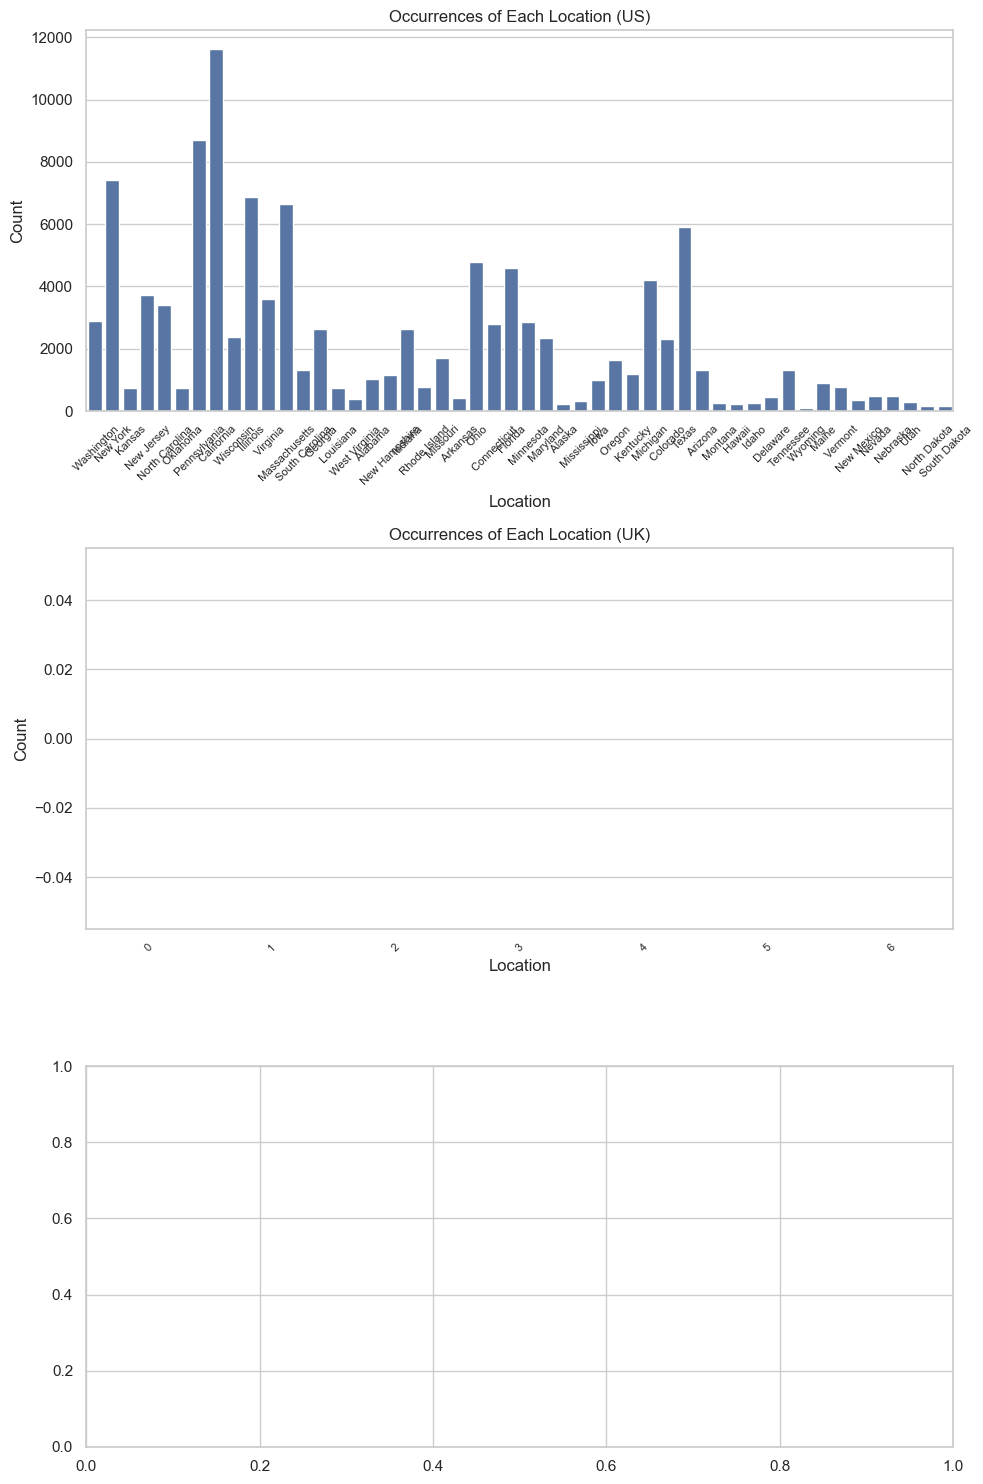

In [81]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.countplot(data=users_adv[users_adv['US'] == True], x='location_region', ax=axes[0])
axes[0].set_title('Occurrences of Each Location (US)')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45, labelsize=8)

sns.countplot(data=users_adv[users_adv['UK'] == True], x='location_region', ax=axes[1])
axes[1].set_title('Occurrences of Each Location (UK)')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45, labelsize=8)

"""
No regions in canada
sns.countplot(data=users_adv[users_adv['Canada'] == True], x='location_region', ax=axes[2])
axes[2].set_title('Occurrences of Each Location (Canada)')
axes[2].set_xlabel('Location')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45, labelsize=8)
"""

plt.tight_layout()
plt.show()

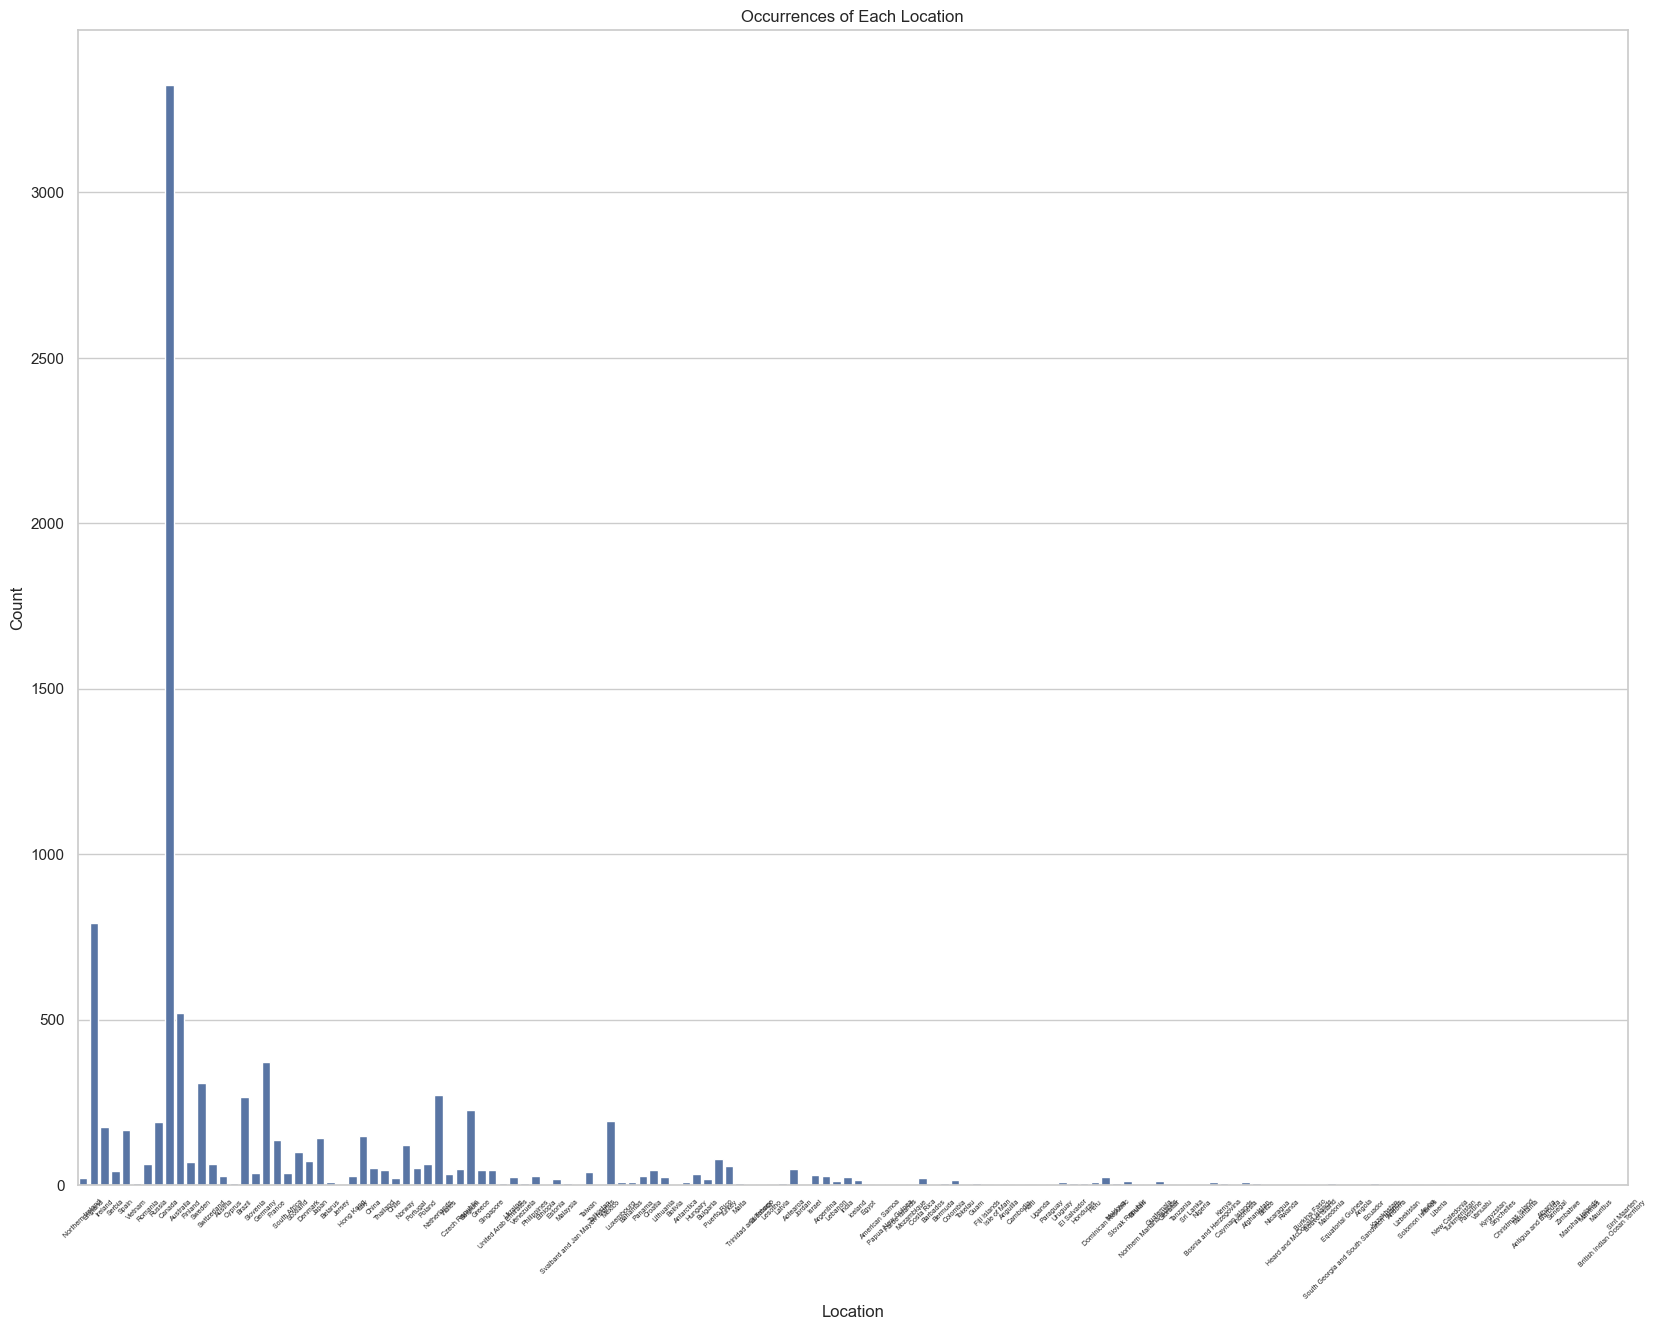

In [82]:
plt.figure(figsize=(20, 15))
sns.countplot(data=users_adv[users_adv['US'] == False], x='location')
plt.title('Occurrences of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=5) 
plt.show()


### Ratings

In [86]:
rating_BA=pd.read_csv('data/birre/BeerAdvocate/ratings_cleaned.csv')
utils.dataset_information(rating_BA, "Ratings RateBeer")



########################################################
We are starting analysing dataset Ratings RateBeer
- Dimension of starting dataset: (8392192, 17)
- Columns of dataset:  Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'review'],
      dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
        beer_name  beer_id                          brewery_name  brewery_id  \
0  Barelegs Brew    19590  Strangford Lough Brewing Company Ltd       10093   
1  Barelegs Brew    19590  Strangford Lough Brewing Company Ltd       10093   
2  Barelegs Brew    19590  Strangford Lough Brewing Company Ltd       10093   
3  Barelegs Brew    19590  Strangford Lough Brewing Company Ltd       10093   
4       Legbiter    19827  Strangford Lough Brewing Company Ltd       10093   

 

In [87]:
rating_BA_cleaned = rating_BA.dropna(subset=['rating', 'date'])

rating_BA_cleaned = rating_BA.drop_duplicates(subset=['beer_name','date', 'user_name'])

rating_min = rating_BA_cleaned['rating'].min()
rating_max = rating_BA_cleaned['rating'].max()



In [88]:
ratings_adv_locations = rating_BA_cleaned.merge(
    breweries_adv_filt[['brewery_name', 'location', 'location_region', 'US', 'UK', 'Canada']],
    on='brewery_name',
    how='left'
)



In [89]:

columns_rename = {
    'location': 'location_beer',
    'location_region': 'location_region_beer',
    'US': 'US_beer',
    'UK': 'UK_beer',
    'Canada': 'Canada_beer'
}
ratings_adv_locations = ratings_adv_locations.rename(columns=columns_rename)

In [90]:
ratings_adv_locations_complete = ratings_adv_locations.merge(
    users_adv_unique[['user_name', 'location', 'location_region', 'US', 'UK', 'Canada']],
    on='user_name',
    how='left'
)

columns_rename = {
    'location': 'location_user',
    'location_region': 'location_region_user',
    'US': 'US_user',
    'UK': 'UK_user',
    'Canada': 'Canada_user'
}
ratings_adv_locations_complete = ratings_adv_locations_complete.rename(columns=columns_rename)


In [91]:
ratings_adv_locations_complete['date'] = pd.to_datetime(ratings_adv_locations_complete['date'], unit='s')
ratings_adv_locations_complete['year'] = ratings_adv_locations_complete['date'].dt.year

ratings_adv_locations_complete.head()

beer_name  beer_id                          brewery_name  brewery_id  \
0  Barelegs Brew    19590  Strangford Lough Brewing Company Ltd       10093   
1  Barelegs Brew    19590  Strangford Lough Brewing Company Ltd       10093   
2  Barelegs Brew    19590  Strangford Lough Brewing Company Ltd       10093   
3  Barelegs Brew    19590  Strangford Lough Brewing Company Ltd       10093   
4       Legbiter    19827  Strangford Lough Brewing Company Ltd       10093   

              style  abv                date        user_name  \
0  English Pale Ale  4.5 2009-02-20 11:00:00      StJamesGate   
1  English Pale Ale  4.5 2006-03-13 11:00:00          mdagnew   
2  English Pale Ale  4.5 2004-12-01 11:00:00  helloloser12345   
3  English Pale Ale  4.5 2004-08-30 10:00:00       cypressbob   
4  English Pale Ale  4.8 2014-12-01 11:00:00        Hellpop65   

                 user_id  appearance  ...  location_region_beer  US_beer  \
0     stjamesgate.163714         3.0  ...                  None    False   
1          mdagnew.19527         4.0  ...                  None    False   
2  helloloser12345.10867         4.0  ...                  None    False   
3        cypressbob.3708         4.0  ...                  None    False   
4        hellpop65.48993         NaN  ...                  None    False   

   UK_beer  Canada_beer     location_user location_region_user  US_user  \
0    False        False     United States             New York     True   
1    False        False  Northern Ireland                 None    False   
2    False        False  Northern Ireland                 None    False   
3    False        False  Northern Ireland                 None    False   
4    False        False     United States               Kansas     True   

  UK_user Canada_user  year  
0   False       False  2009  
1    True       False  2006  
2    True       False  2004  
3    True       False  2004  
4   False       False  2014  

[5 rows x 28 columns]

In [95]:
ratings_adv_locations_complete_filt = ratings_adv_locations_complete.dropna(subset=['beer_id', 'user_id'])
utils.dataset_information(ratings_adv_locations_complete_filt, "Ratings filtered")



########################################################
We are starting analysing dataset Ratings filtered
- Dimension of starting dataset: (9118334, 28)
- Columns of dataset:  Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'review', 'location_beer',
       'location_region_beer', 'US_beer', 'UK_beer', 'Canada_beer',
       'location_user', 'location_region_user', 'US_user', 'UK_user',
       'Canada_user', 'year'],
      dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
        beer_name  beer_id                          brewery_name  brewery_id  \
0  Barelegs Brew    19590  Strangford Lough Brewing Company Ltd       10093   
1  Barelegs Brew    19590  Strangford Lough Brewing Company Ltd       10093   
2  Barelegs Brew    19590  Strangford Lough Brewing Co

In [96]:
utils.ensure_col_types2(ratings_adv_locations_complete_filt, ['beer_id','brewery_id','user_id'],['abv'],['beer_name','brewery_name','style','user_name'])

AttributeError: module 'utils' has no attribute 'ensure_col_types2'

In [99]:
missing_beers = ratings_adv_locations_complete[~ratings_adv_locations_complete['beer_id'].isin(beers_adv_filt_unique_location['beer_id'])]

if missing_beers.empty:
    print("All 'beers_id' in the ratings dataset are present in the beers_adv dataset.")
else:
    print(f"The following 'beers_id' are missing in beers_adv:\n{missing_beers['beer_id'].unique()}")


The following 'beers_id' are missing in beers_adv:
[153718 178689 247044 ... 171765 101261 148940]


In [101]:
ratings_adv_locations_complete_filt = ratings_adv_locations_complete_filt[
    ratings_adv_locations_complete_filt['beer_id'].isin(beers_adv_filt_unique_location['beer_id']) & ratings_adv_locations_complete_filt['user_name'].isin(users_adv_unique['user_name'])
]
utils.dataset_information(ratings_adv_locations_complete_filt, "Missing beers")



########################################################
We are starting analysing dataset Missing beers
- Dimension of starting dataset: (8907682, 28)
- Columns of dataset:  Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'review', 'location_beer',
       'location_region_beer', 'US_beer', 'UK_beer', 'Canada_beer',
       'location_user', 'location_region_user', 'US_user', 'UK_user',
       'Canada_user', 'year'],
      dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
        beer_name  beer_id                          brewery_name  brewery_id  \
0  Barelegs Brew    19590  Strangford Lough Brewing Company Ltd       10093   
1  Barelegs Brew    19590  Strangford Lough Brewing Company Ltd       10093   
2  Barelegs Brew    19590  Strangford Lough Brewing Compa

In [102]:
# Total rows
total_rows = len(ratings_adv_locations_complete_filt)

# Count of NaN values in 'text' column
nan_text_count = ratings_adv_locations_complete_filt['text'].isna().sum()

print("Total NaN values in 'text':", nan_text_count)
print("Total rows in dataset:", total_rows)


Total NaN values in 'text': 5936827
Total rows in dataset: 8907682


In [103]:
# Drop rows where 'text' column has NaN values
df_cleaned = ratings_adv_locations_complete_filt.dropna(subset=['text'])


# Check new dimensions to confirm rows with NaN in 'text' were dropped
print("New dataset dimensions:", df_cleaned.shape)
print(df_cleaned['text'])

New dataset dimensions: (2970855, 28)
0          Pours pale copper with a thin head that quickl...
1          500ml Bottle bought from The Vintage, Antrim.....
2          Serving: 500ml brown bottlePour: Good head wit...
3          500ml bottlePours with a light, slightly hazy ...
11         This was a 12 oz bottle poured into a snifter....
                                 ...                        
9118328    It may say APA on this site, but talking to th...
9118329    I'll start off reviewing this beer with the fo...
9118330    Served on draft at the pub. Poured a clear yel...
9118331    Served on tap at the brewpub in a pint glass.A...
9118333    Dark brown brew served on tap at the brewpub. ...
Name: text, Length: 2970855, dtype: object


## Processed savings

In [ ]:
confirmation = input("Do you want to save the processed files? Type 'yes' to confirm: ").strip().lower()

if confirmation == 'yes':
    utils.write_csv_into_directory('data/Processed/BeerAdvocate', 'beers_processed.csv', beers_adv_filt_unique_location)
    utils.write_csv_into_directory('data/Processed/BeerAdvocate', 'breweries_processed.csv', breweries_adv_filt)
    utils.write_csv_into_directory('data/Processed/BeerAdvocate', 'users_processed.csv', users_adv_unique)
    utils.write_csv_into_directory('data/Processed/BeerAdvocate', 'ratings_processed.csv', ratings_adv_locations_complete_filt)
    utils.write_csv_into_directory('data/Processed/BeerAdvocate', 'review_processed.csv', df_cleaned)
    print("Files saved successfully!")
else:
    print("Operation canceled. No files were saved.")

## task 3

In [107]:
total_ba=ratings_adv_locations_complete_filt.copy()


In [111]:

# Step 1: Count reviews per group and filter based on threshold
review_counts_ba = total_ba.groupby(['beer_id', 'year', 'location_user']).size().reset_index(name='review_count')

# Step 2: Merge back to the main DataFrame and filter for groups with at least 5 reviews
reviews_with_counts_ba = pd.merge(total_ba, review_counts_ba, on=['beer_id', 'year', 'location_user'])
filtered_reviews_ba = reviews_with_counts_ba[reviews_with_counts_ba['review_count'] >= 5]

# Step 3: Calculate weighted average rating for each group
weighted_avg_ratings_ba = filtered_reviews_ba.groupby(['beer_id', 'beer_name', 'year', 'review_count','location_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')

weighted_avg_ratings_ba['rank'] = (
    weighted_avg_ratings_ba.sort_values(['year', 'location_user', 'weighted_avg_rating', 'review_count'], 
                                        ascending=[True, True, False, False])
    .groupby(['year', 'location_user'])
    .cumcount() + 1
)

# Check results
weighted_avg_ratings_ba.head()


/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_51833/4202267643.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_ratings_ba = filtered_reviews_ba.groupby(['beer_id', 'beer_name', 'year', 'review_count','location_user']).apply(


beer_id                 beer_name  year  review_count  location_user  \
0        4  Wildcatter's Crude Stout  2003             5  United States   
1        5                     Amber  2002            20  United States   
2        5                     Amber  2003            21  United States   
3        5                     Amber  2004            30  United States   
4        5                     Amber  2005            32  United States   

   weighted_avg_rating  rank  
0             3.834000   965  
1             3.423500   899  
2             3.378571  1805  
3             3.398667  2148  
4             3.421875  2363

In [113]:
# Pivot data for heatmap
top_ranked_beers_ba = weighted_avg_ratings_ba[weighted_avg_ratings_ba['rank'] == 1]

pivot_data_ba =top_ranked_beers_ba.pivot_table(
    values='weighted_avg_rating', 
    index='year', 
    columns='location_user', 
    aggfunc='mean'
)





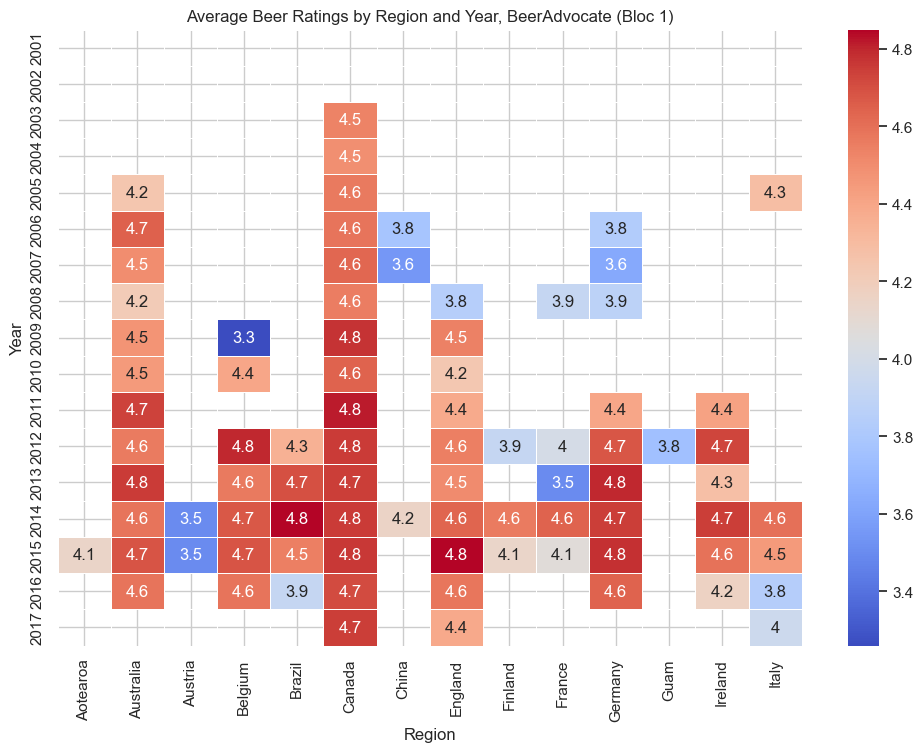

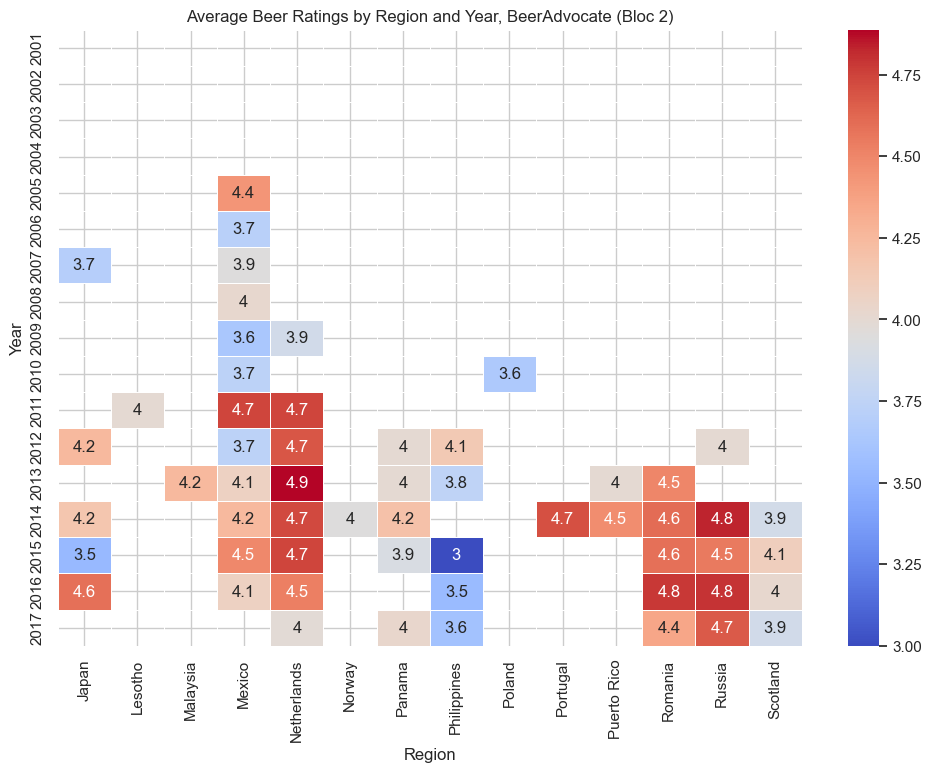

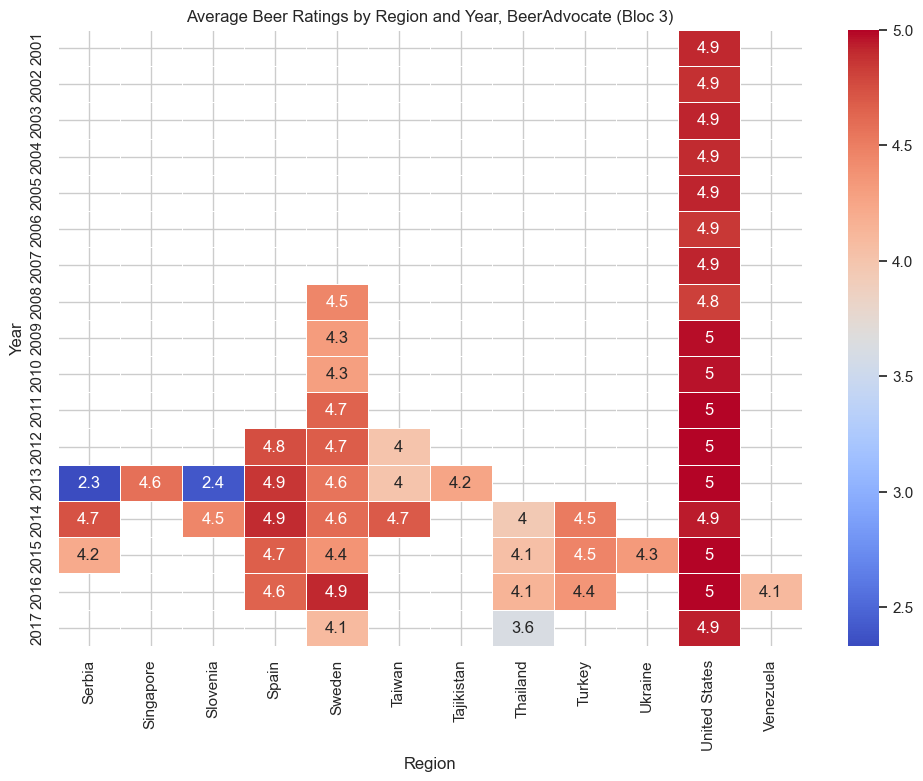

In [117]:

chunk_size = 14


num_chunks = len(pivot_data_ba.columns) // chunk_size + (1 if len(pivot_data_ba.columns) % chunk_size != 0 else 0)

for i in range(num_chunks):
    start = i * chunk_size
    end = start + chunk_size
    chunk = pivot_data_ba.iloc[:, start:end]  # Seleziona le colonne del blocco
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(chunk, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Average Beer Ratings by Region and Year, BeerAdvocate (Bloc {i+1})')
    plt.xlabel('Region')
    plt.ylabel('Year')
    plt.show()


In [119]:

review_counts_us_ba= total_ba.groupby(['beer_id', 'year', 'location_region_user']).size().reset_index(name='review_count')


reviews_with_counts_us_ba = pd.merge(total_ba, review_counts_us_ba, on=['beer_id', 'year', 'location_region_user'])
filtered_reviews_us_ba = reviews_with_counts_us_ba[reviews_with_counts_us_ba['review_count'] >= 5]

weighted_avg_ratings_us_ba = filtered_reviews_us_ba.groupby(['beer_id', 'beer_name', 'year','review_count', 'location_region_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')


weighted_avg_ratings_us_ba['rank'] = (
    weighted_avg_ratings_us_ba.sort_values(['year', 'location_region_user', 'weighted_avg_rating', 'review_count'], 
                                        ascending=[True, True, False, False])
    .groupby(['year', 'location_region_user'])
    .cumcount() + 1
)



/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_51833/2773737911.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_ratings_us_ba = filtered_reviews_us_ba.groupby(['beer_id', 'beer_name', 'year','review_count', 'location_region_user']).apply(


In [121]:
# Pivot data for heatmap
top_ranked_beers_us_ba = weighted_avg_ratings_us_ba[weighted_avg_ratings_us_ba['rank'] == 1]

pivot_data_us_ba= top_ranked_beers_us_ba.pivot_table(
    values='weighted_avg_rating', 
    index='year', 
    columns='location_region_user', 
    aggfunc='mean'
)




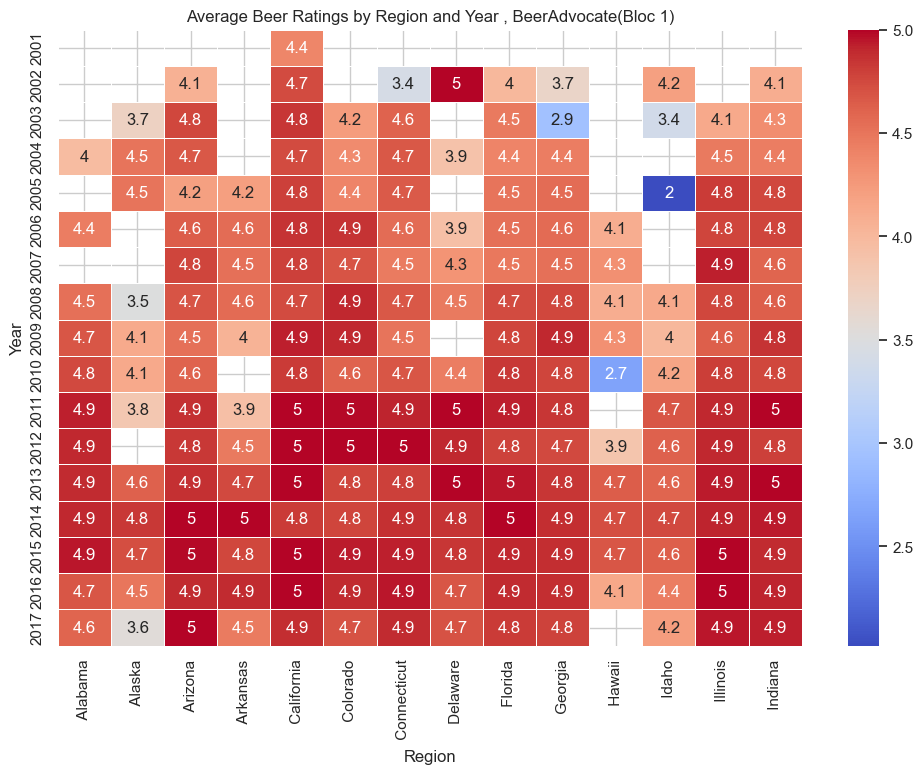

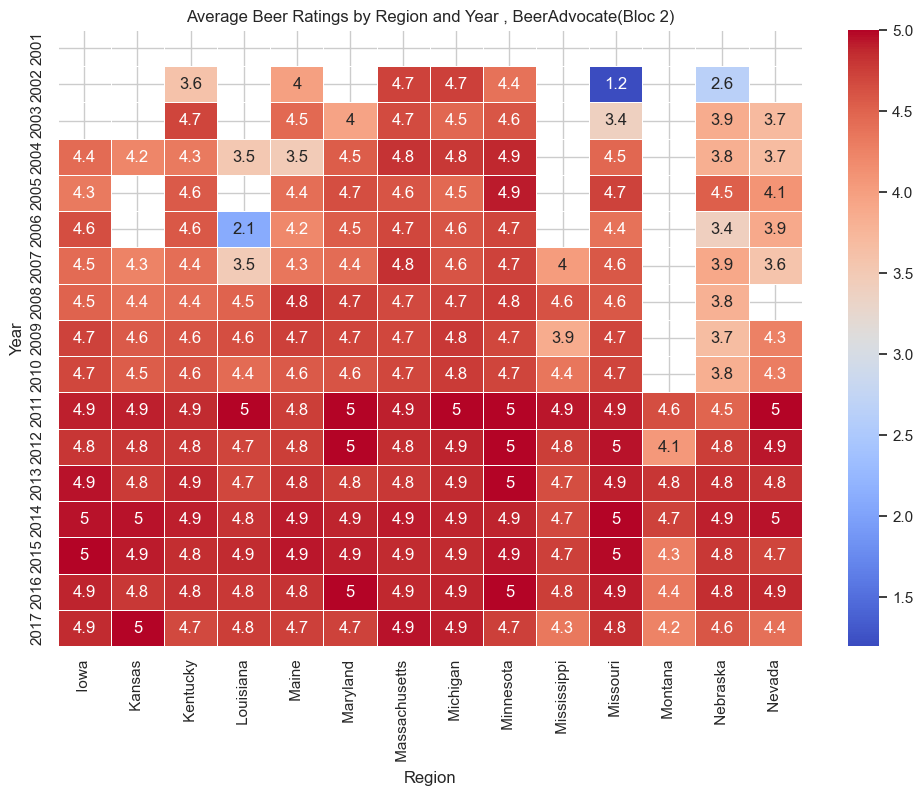

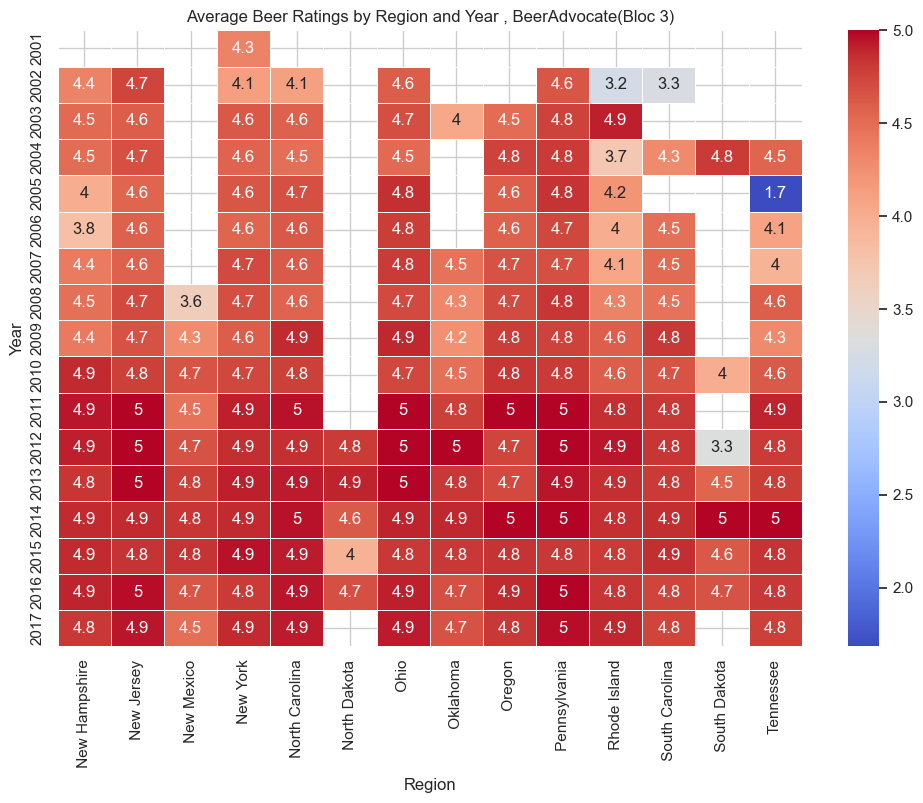

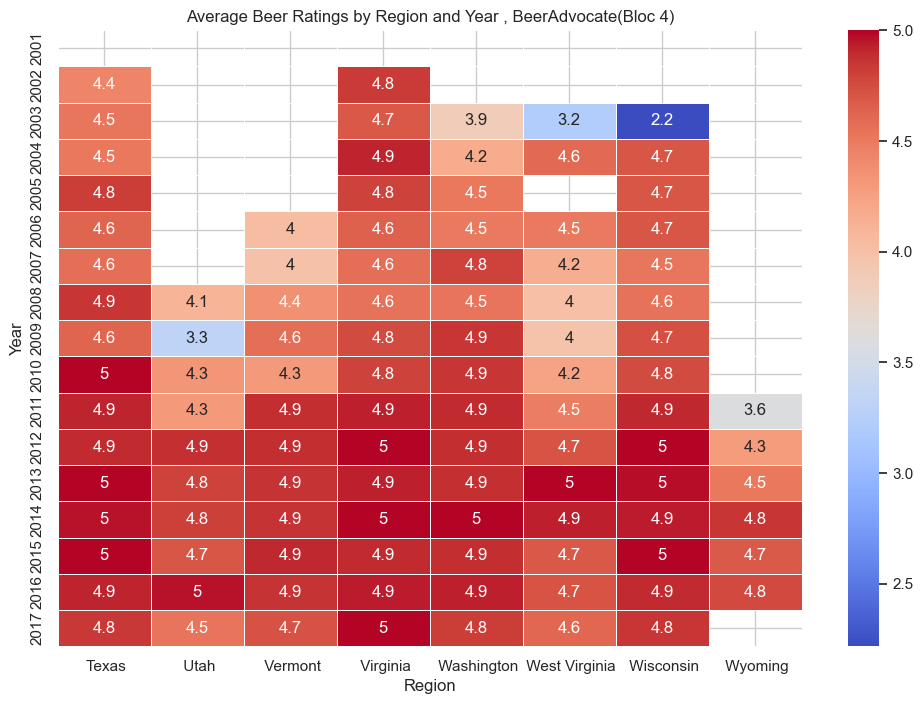

In [127]:

chunk_size = 14
num_chunks = len(pivot_data_us_ba.columns) // chunk_size + (1 if len(pivot_data_us_ba.columns) % chunk_size != 0 else 0)

for i in range(num_chunks):
    start = i * chunk_size
    end = start + chunk_size
    chunk = pivot_data_us_ba.iloc[:, start:end]  
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(chunk, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Average Beer Ratings by Region and Year , BeerAdvocate(Bloc {i+1})')
    plt.xlabel('Region')
    plt.ylabel('Year')
    plt.show()

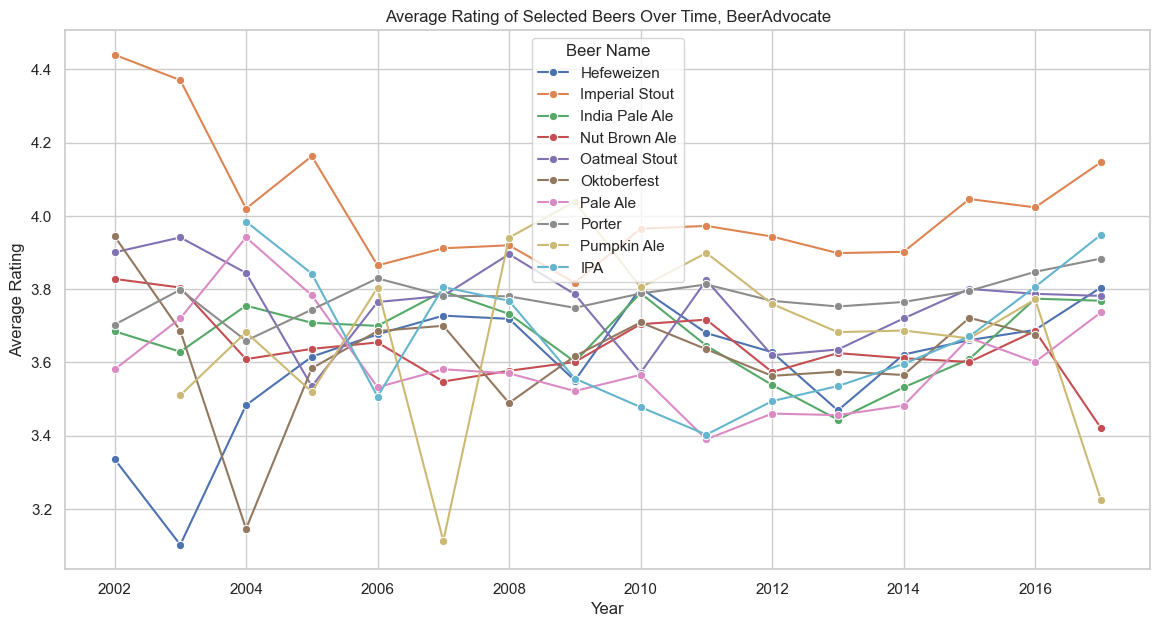

In [131]:

top_beers_ba = weighted_avg_ratings_ba['beer_name'].value_counts().nlargest(10).index
time_series_data_ba = weighted_avg_ratings_ba[weighted_avg_ratings_ba['beer_name'].isin(top_beers_ba)]

time_series_data_ba = time_series_data_ba.groupby(['year', 'beer_name']).agg({'weighted_avg_rating': 'mean'}).reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=time_series_data_ba, x='year', y='weighted_avg_rating', hue='beer_name', marker='o')
plt.title('Average Rating of Selected Beers Over Time, BeerAdvocate')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Beer Name')
plt.show()


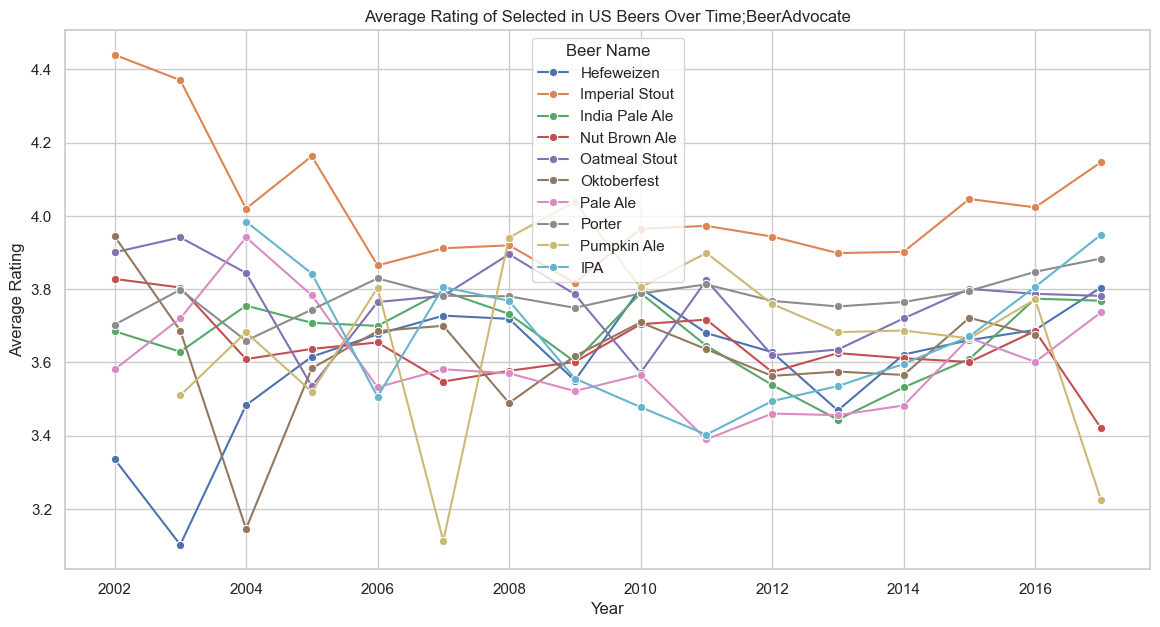

In [135]:

top_beers_ba= weighted_avg_ratings_ba[weighted_avg_ratings_ba['location_user']=='United States']['beer_name'].value_counts().nlargest(10).index
time_series_data_ba = weighted_avg_ratings_ba[weighted_avg_ratings_ba['beer_name'].isin(top_beers_ba)]

time_series_data_ba =time_series_data_ba.groupby(['year', 'beer_name']).agg({'weighted_avg_rating': 'mean'}).reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=time_series_data_ba, x='year', y='weighted_avg_rating', hue='beer_name', marker='o')
plt.title('Average Rating of Selected in US Beers Over Time;BeerAdvocate')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Beer Name')
plt.show()


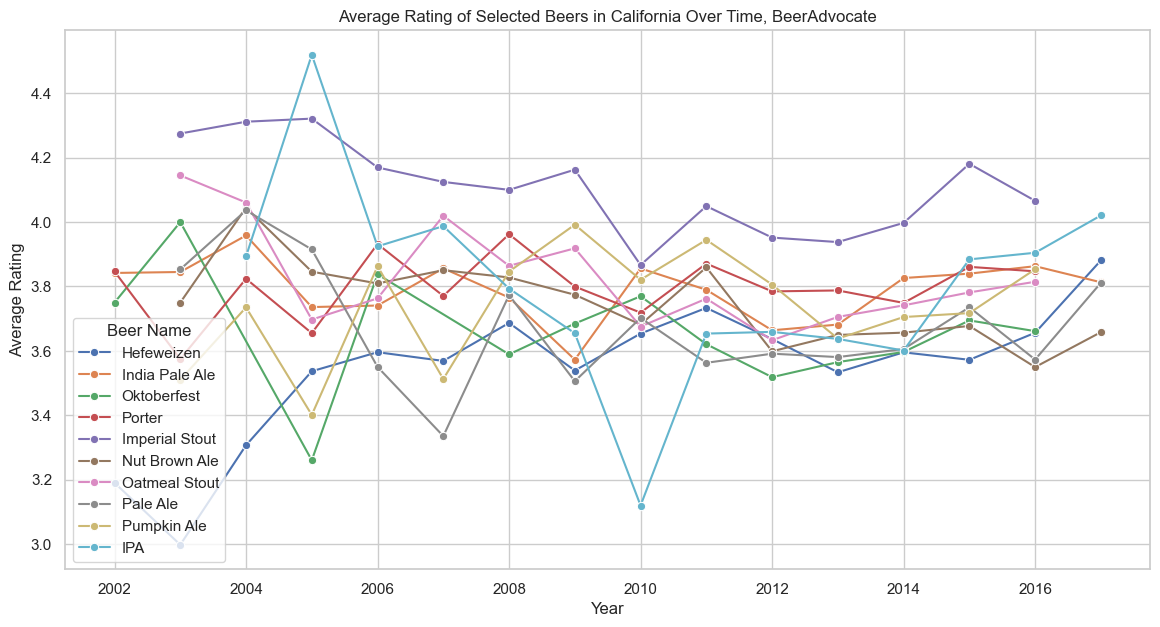

In [139]:

top_beers_cali_ba = weighted_avg_ratings_us_ba[weighted_avg_ratings_us_ba['location_region_user']=='California']['beer_name'].value_counts().nlargest(10).index
time_series_data_cali_ba = weighted_avg_ratings_us_ba[weighted_avg_ratings_us_ba['beer_name'].isin(top_beers_ba)]

time_series_data_cali_ba = time_series_data_cali_ba.groupby(['year', 'beer_name']).agg({'weighted_avg_rating': 'mean'}).reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=time_series_data_cali_ba, x='year', y='weighted_avg_rating', hue='beer_name', marker='o')
plt.title('Average Rating of Selected Beers in California Over Time, BeerAdvocate')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Beer Name')
plt.show()



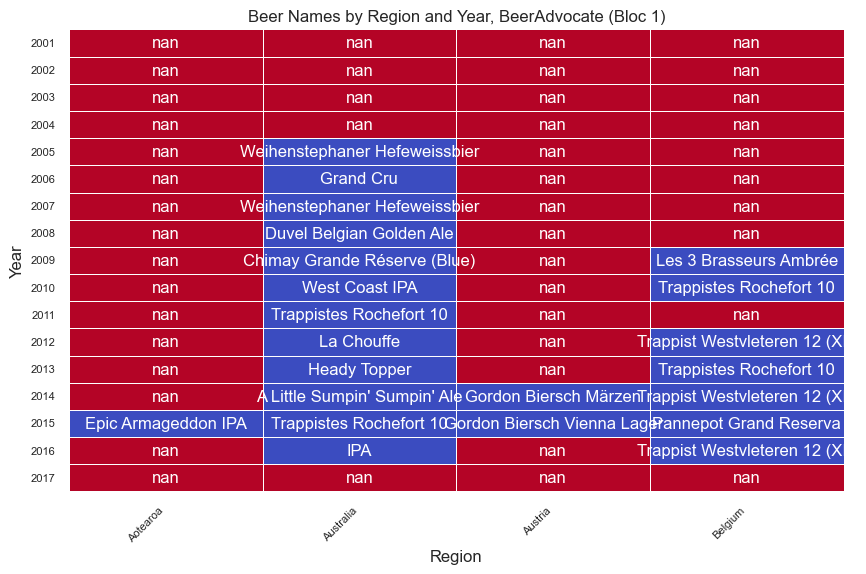

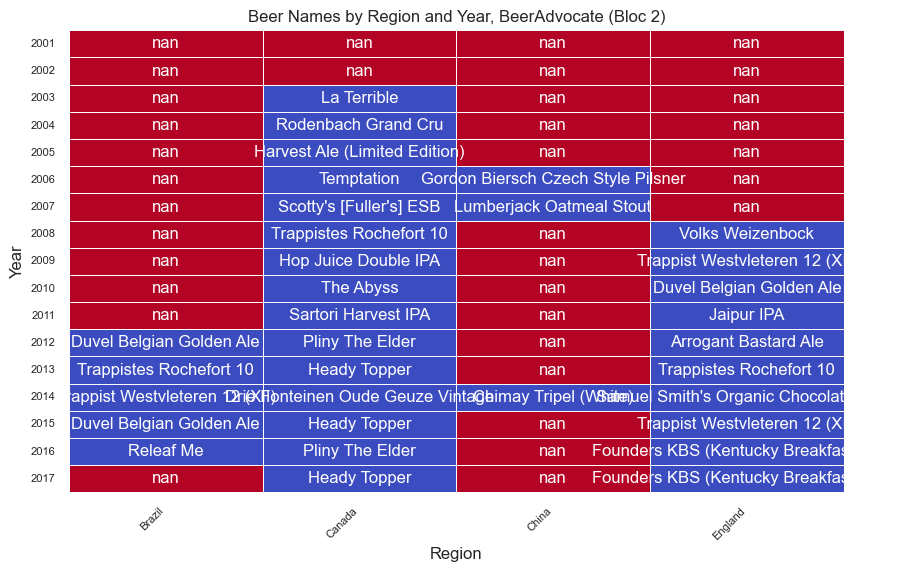

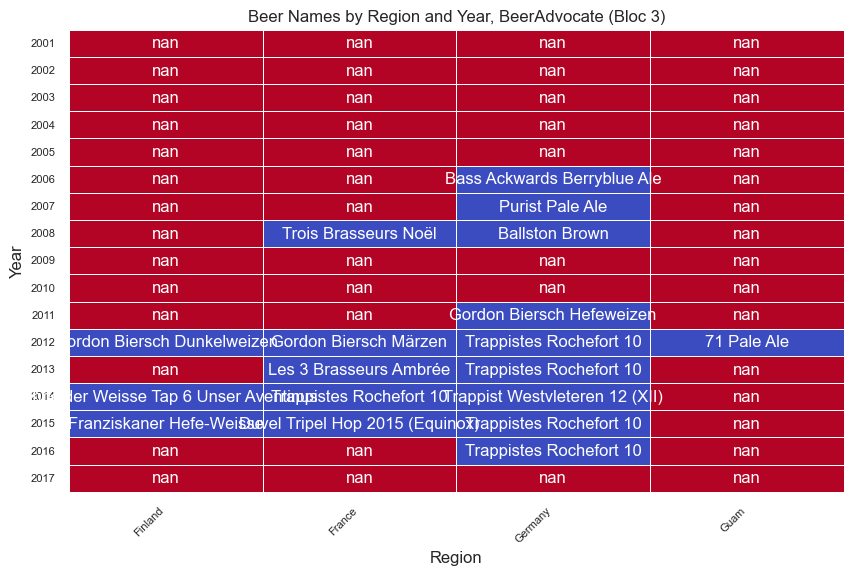

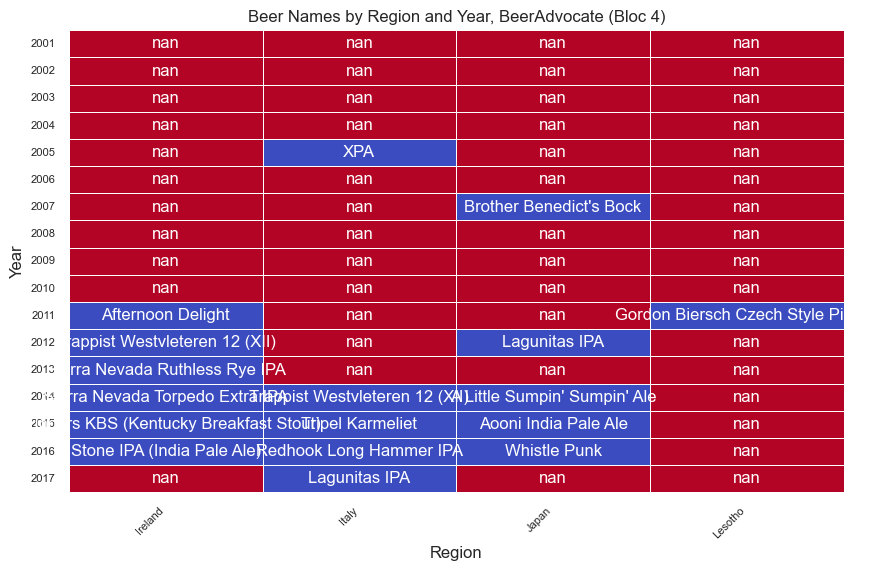

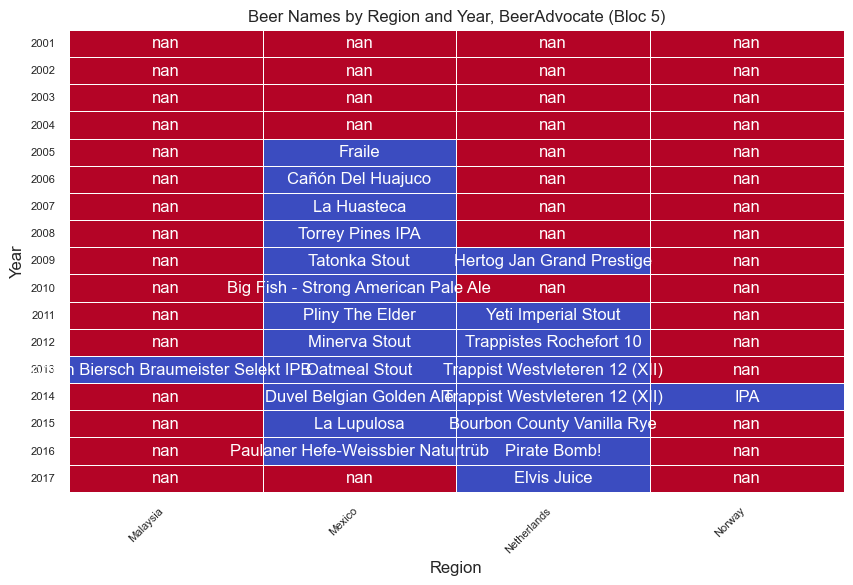

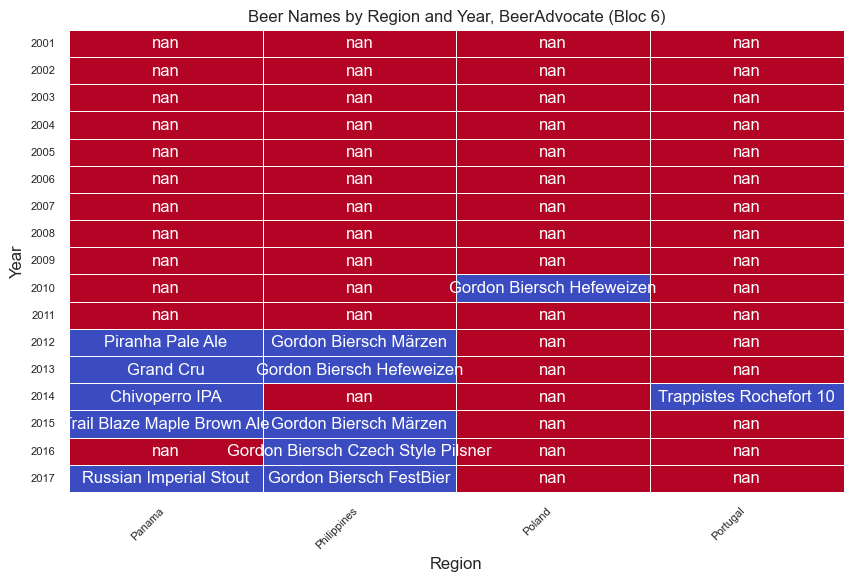

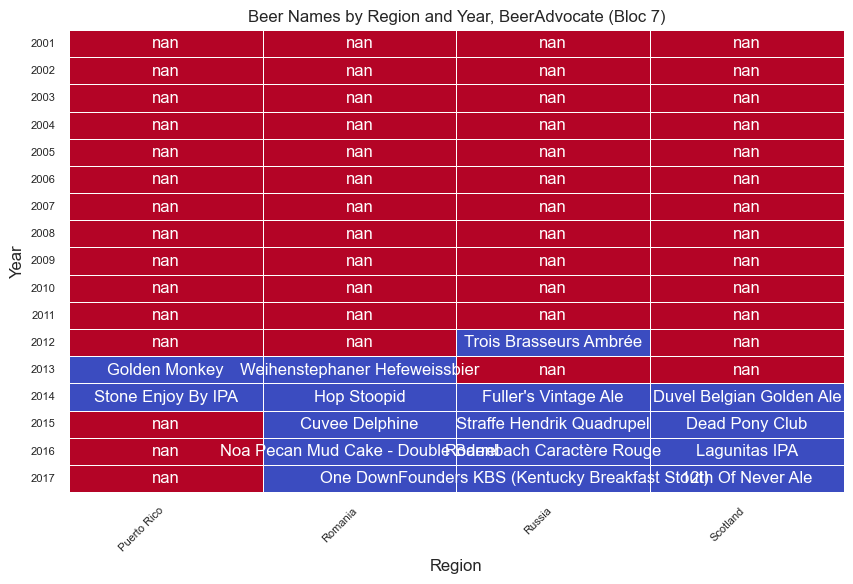

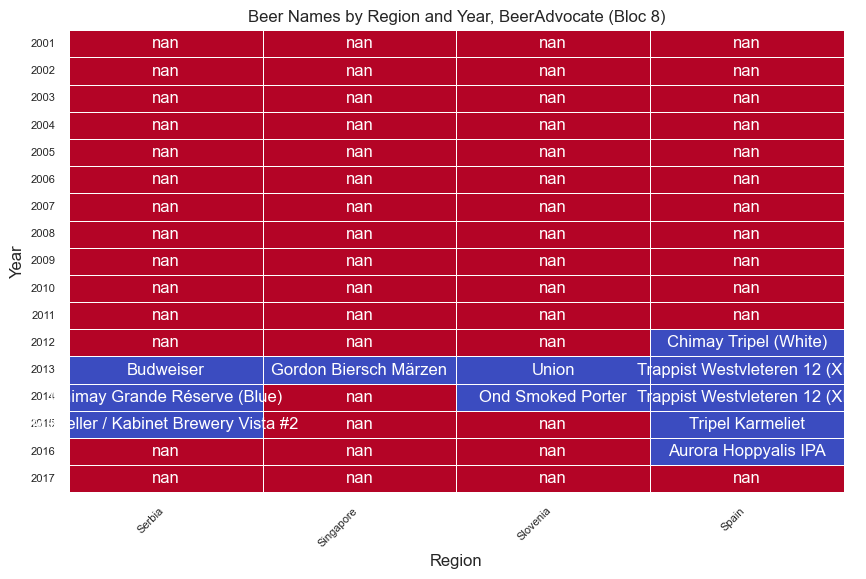

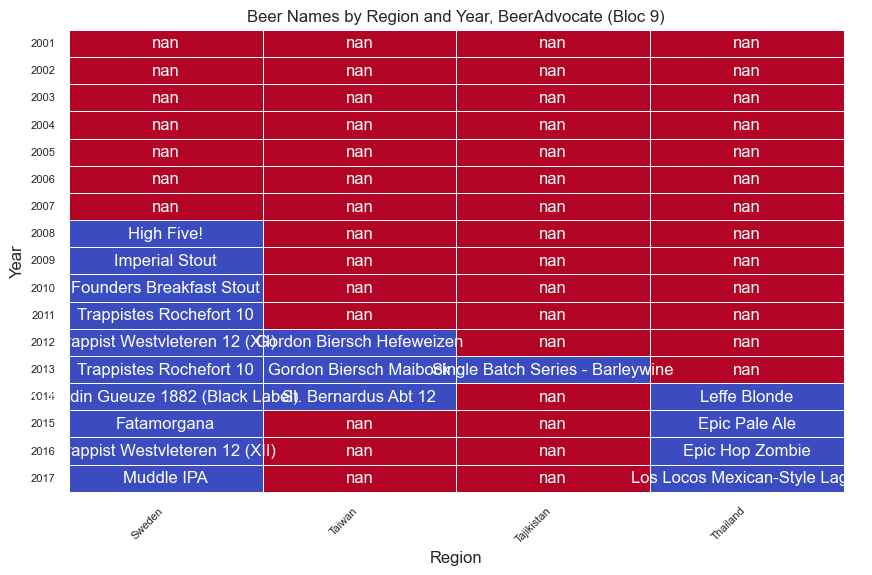

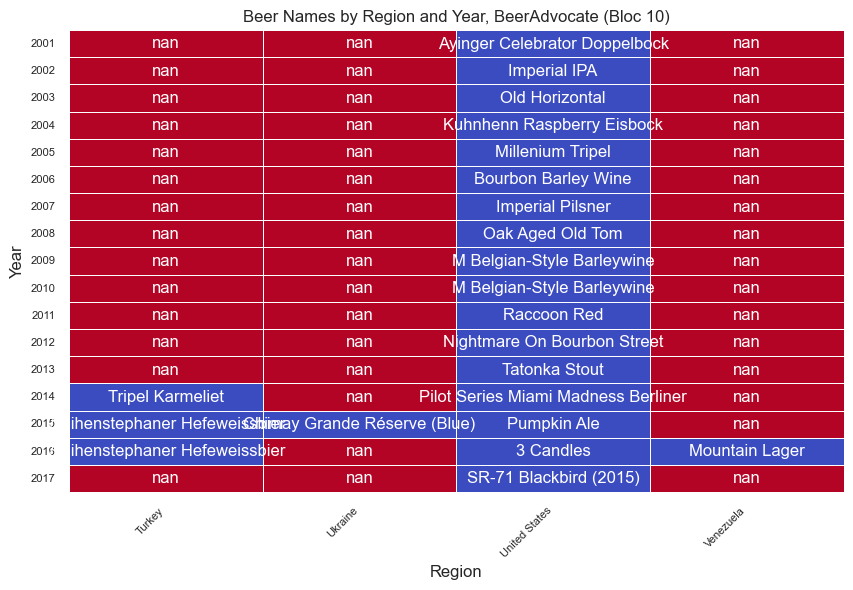

In [141]:

pivot_data_name_ba = top_ranked_beers_ba.pivot_table(
    values='beer_name', 
    index='year', 
    columns='location_user', 
    aggfunc=lambda x: ', '.join(x.dropna())
)


chunk_size = 4  
num_chunks = (pivot_data_name_ba.shape[1] + chunk_size - 1) // chunk_size

for i in range(num_chunks):
    start = i * chunk_size
    end = start + chunk_size
    chunk = pivot_data_name_ba.iloc[:, start:end]  
    
   
    plt.figure(figsize=(10, 6))  
    sns.heatmap(
        chunk.isna().astype(int),  
        annot=chunk, fmt='', cmap='coolwarm', linewidths=0.5, cbar=False
    )
    plt.title(f'Beer Names by Region and Year, BeerAdvocate (Bloc {i+1})')
    plt.xlabel('Region')
    plt.ylabel('Year')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()



In [143]:

review_counts_br_ba = total_ba.groupby(['brewery_id', 'year', 'location_user']).size().reset_index(name='review_count')


reviews_with_counts_br_ba = pd.merge(total_ba, review_counts_br_ba, on=['brewery_id', 'year', 'location_user'])
filtered_reviews_br_ba = reviews_with_counts_br_ba[reviews_with_counts_br_ba['review_count'] >= 5]

weighted_avg_ratings_br_ba = filtered_reviews_br_ba.groupby(['brewery_id','brewery_name', 'year','review_count', 'location_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')


weighted_avg_ratings_br_ba['rank'] = (
    weighted_avg_ratings_br_ba.sort_values(['year', 'location_user', 'weighted_avg_rating', 'review_count'], 
                                        ascending=[True, True, False, False])
    .groupby(['year', 'location_user'])
    .cumcount() + 1
)

# Check results


/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_51833/12051656.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_ratings_br_ba = filtered_reviews_br_ba.groupby(['brewery_id','brewery_name', 'year','review_count', 'location_user']).apply(


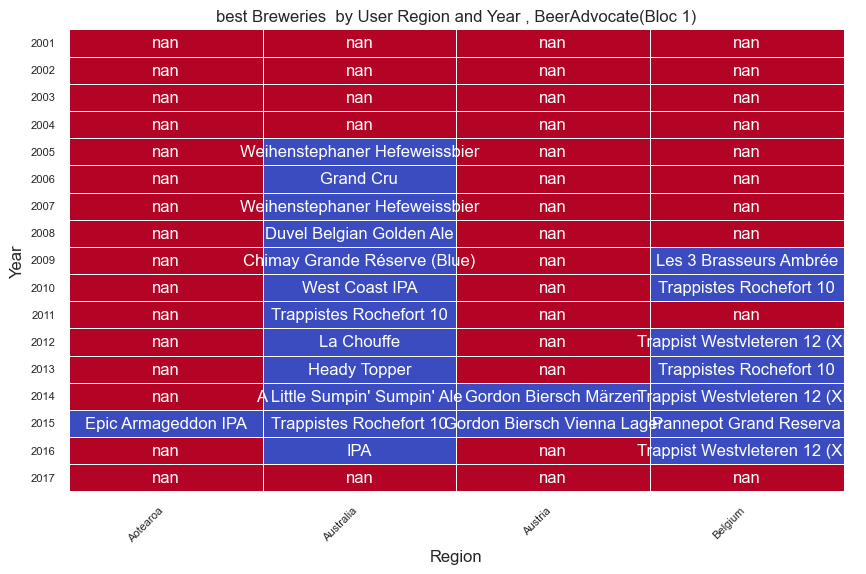

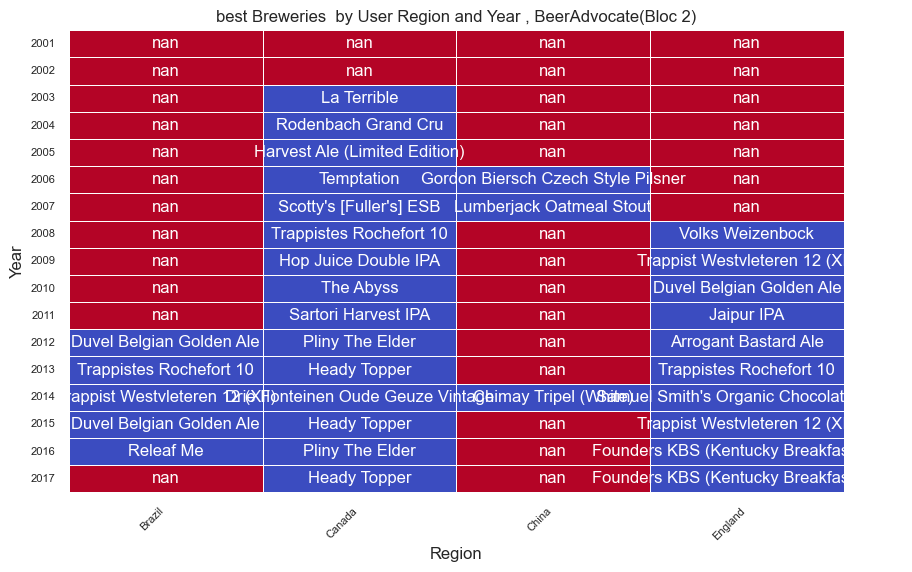

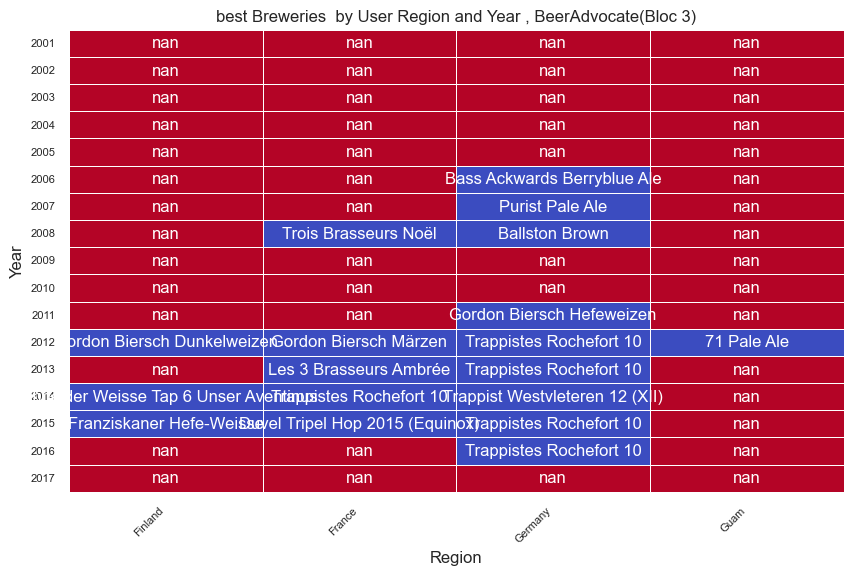

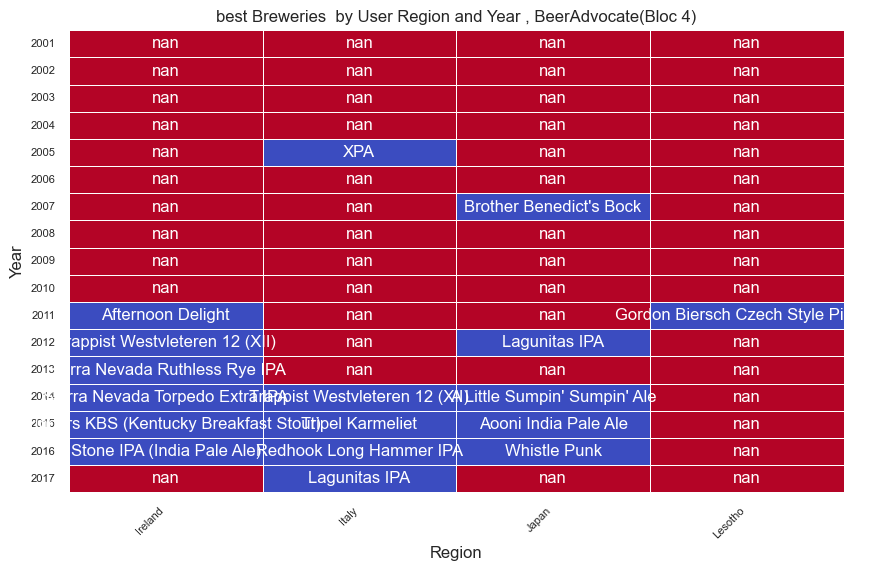

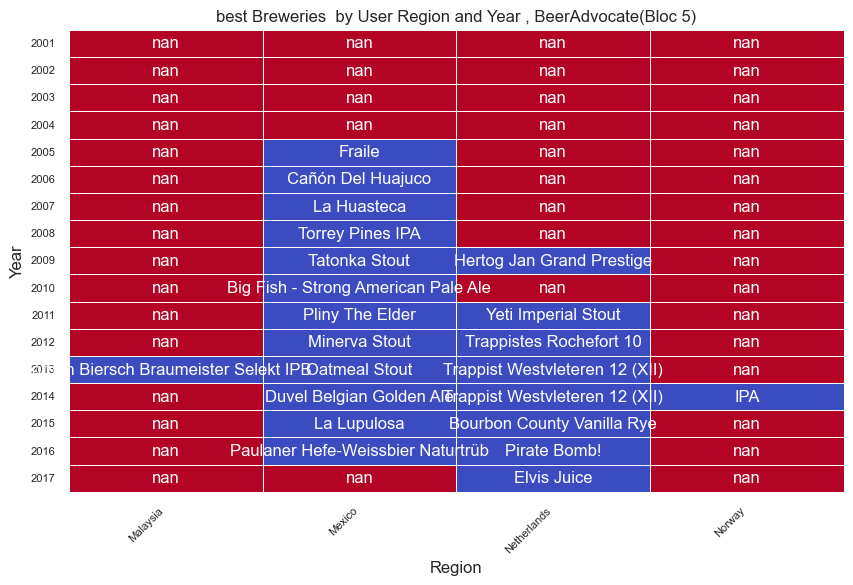

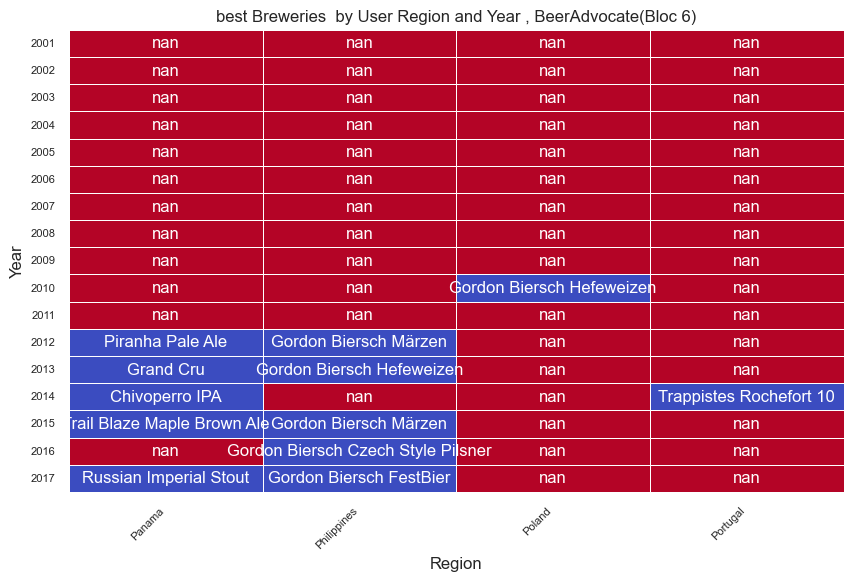

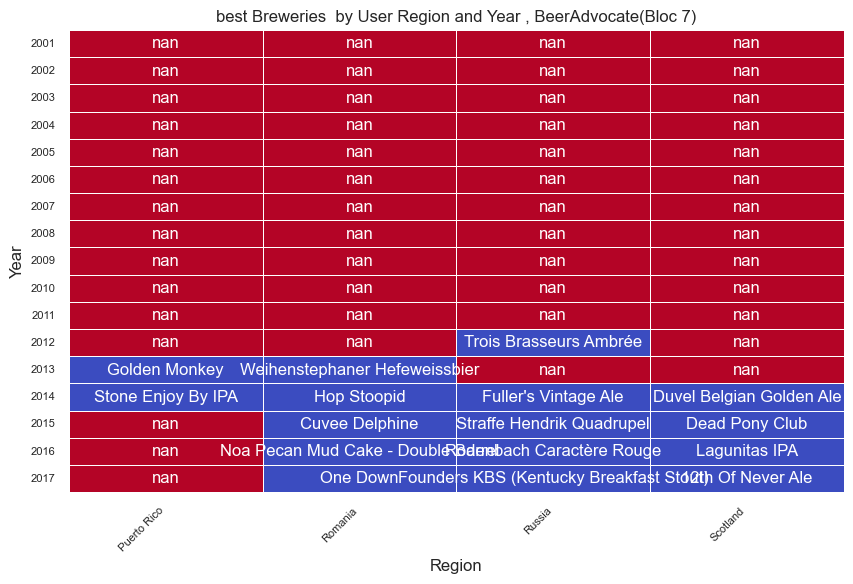

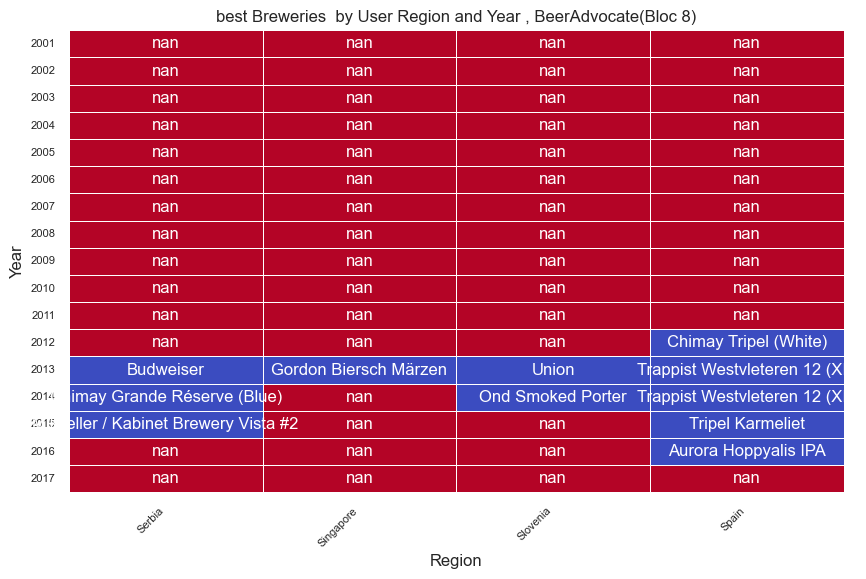

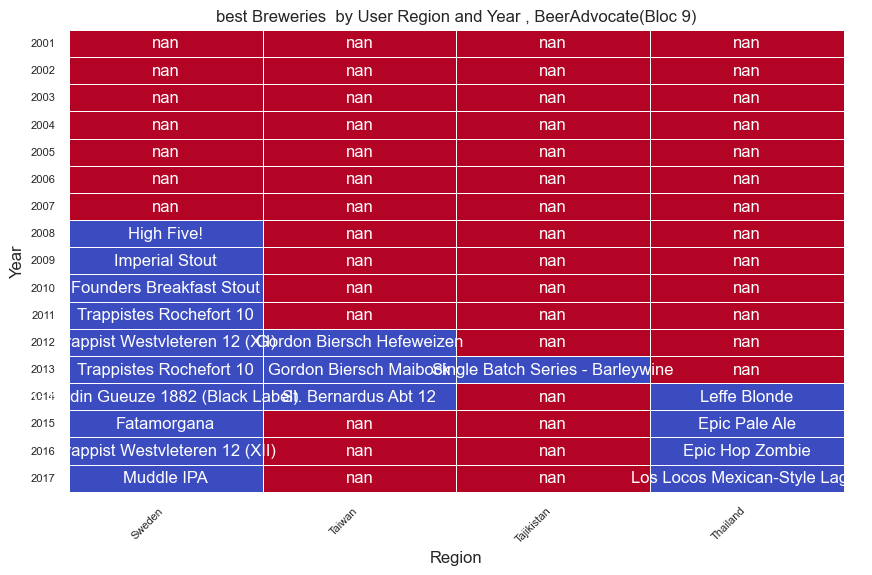

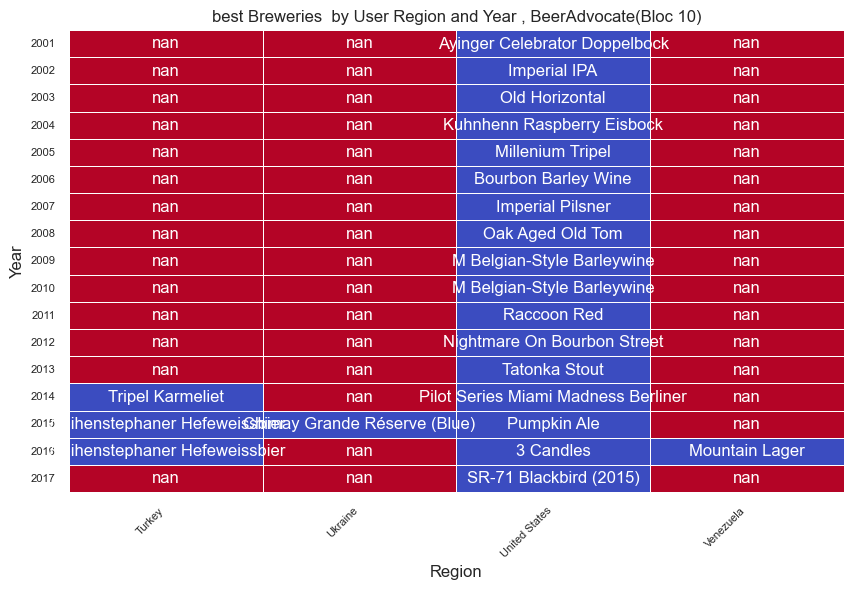

In [144]:
top_ranked_beers_br_ba = weighted_avg_ratings_br_ba[weighted_avg_ratings_br_ba['rank'] == 1]


pivot_data_br_ba = top_ranked_beers_br_ba.pivot_table(
    values='brewery_name', 
    index='year', 
    columns='location_user', 
    aggfunc=lambda x: ', '.join(x.dropna())
)


chunk_size = 4  
num_chunks = (pivot_data_name_ba.shape[1] + chunk_size - 1) // chunk_size

for i in range(num_chunks):
    start = i * chunk_size
    end = start + chunk_size
    chunk = pivot_data_name_ba.iloc[:, start:end] 
    
    
    plt.figure(figsize=(10, 6))  
    sns.heatmap(
        chunk.isna().astype(int), 
        annot=chunk, fmt='', cmap='coolwarm', linewidths=0.5, cbar=False
    )
    plt.title(f'best Breweries  by User Region and Year , BeerAdvocate(Bloc {i+1})')
    plt.xlabel('Region')
    plt.ylabel('Year')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()



Correlation between Number of reviews and average rating, BeerAdvocate: 0.055518135128566945


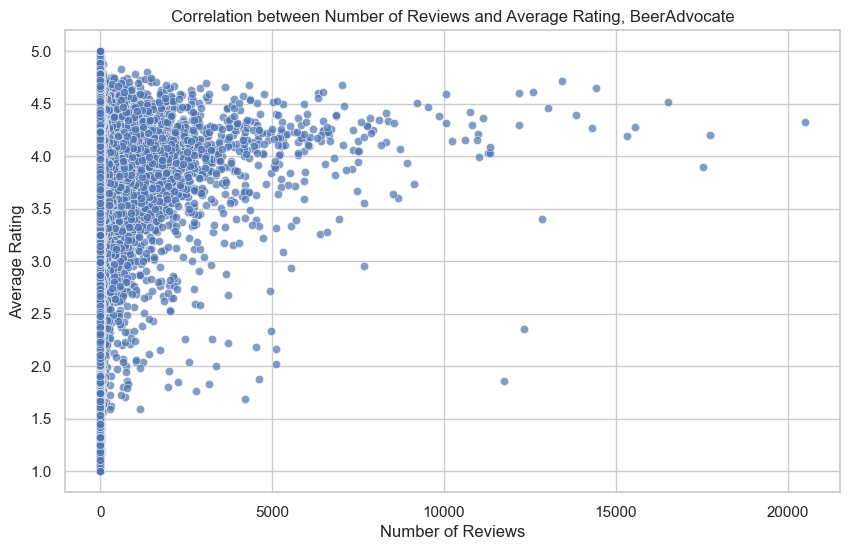

In [145]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the total ratings and review count for each beer
beer_stats_ba = total_ba.groupby('beer_id').agg(
    total_ratings=('rating', 'sum'),       # Sum of regular ratings for each beer
    review_count=('rating', 'count')       # Count of the number of reviews for each beer
).reset_index()

# Calculate the average rating for each beer (regular, not weighted)
beer_stats_ba['average_rating'] = beer_stats_ba['total_ratings'] / beer_stats_ba['review_count']

# Calculate correlation between the number of reviews and the average rating
correlation_ba = beer_stats_ba[['review_count', 'average_rating']].corr().iloc[0, 1]
print(f"Correlation between Number of reviews and average rating, BeerAdvocate: {correlation_ba}")

# Visualize the correlation between review count and average rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=beer_stats_ba, x='review_count', y='average_rating', alpha=0.7)
plt.title('Correlation between Number of Reviews and Average Rating, BeerAdvocate')
plt.xlabel('Number of Reviews')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [ ]:

review_counts_fl_ba = total_ba.groupby(['style', 'year', 'location_user']).size().reset_index(name='review_count')


reviews_with_counts_fl_ba = pd.merge(total_ba, review_counts_fl_ba, on=['style', 'year', 'location_user'])
filtered_reviews_fl_ba= reviews_with_counts_fl_ba[reviews_with_counts_fl_ba['review_count'] >= 5]

weighted_avg_ratings_fl_ba= filtered_reviews_fl_ba.groupby(['style', 'year','review_count', 'location_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')


weighted_avg_ratings_fl_ba['rank'] = (
    weighted_avg_ratings_fl_ba.sort_values(['year', 'location_user', 'weighted_avg_rating', 'review_count'], 
                                        ascending=[True, True, False, False])
    .groupby(['year', 'location_user'])
    .cumcount() + 1
)

# Check results


In [ ]:
top_ranked_beers_fl_ba = weighted_avg_ratings_fl_ba[weighted_avg_ratings_fl_ba['rank'] == 1]

pivot_data_fl_ba = top_ranked_beers_fl_ba.pivot_table(
    values='style', 
    index='year', 
    columns='location_user', 
    aggfunc=lambda x: ', '.join(x.dropna())
)


chunk_size = 4  
num_chunks = (pivot_data_fl_ba.shape[1] + chunk_size - 1) // chunk_size

for i in range(num_chunks):
    start = i * chunk_size
    end = start + chunk_size
    chunk = pivot_data_fl_ba.iloc[:, start:end] 
   
    plt.figure(figsize=(10, 6)) 
    sns.heatmap(
        chunk.isna().astype(int), 
        annot=chunk, fmt='', cmap='coolwarm', linewidths=0.5, cbar=False
    )
    plt.title(f'Best Beer Style by Region and Year, BeerADvocate(Bloc {i+1})')
    plt.xlabel('Region')
    plt.ylabel('Year')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()


/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_51833/3529098518.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_styles_ba = filtered_reviews_ba.groupby(['style']).apply(


Correlation between  style (coded) e Weighted average rating, BeerAdvocate: -0.8636071569031808


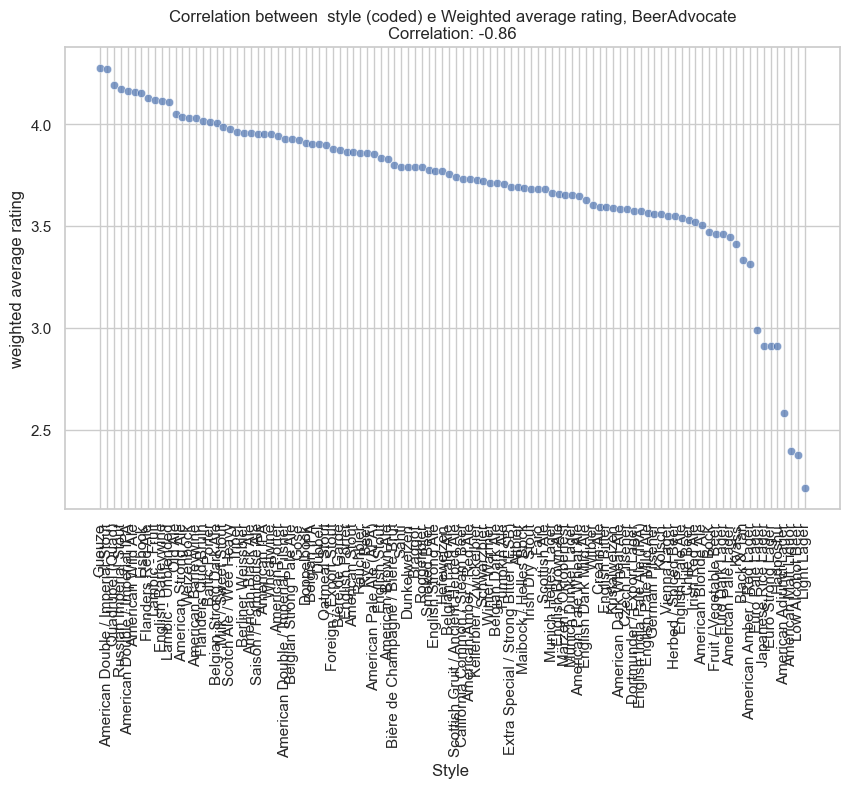

In [159]:
review_counts_ba = total_ba.groupby(['style']).size().reset_index(name='review_count')

# Merge the reviews with their review counts based on style, year, and user location
reviews_with_counts_ba = pd.merge(total_ba, review_counts_ba, on=['style'])

# Filter the reviews to include only those with at least 5 reviews
filtered_reviews_ba = reviews_with_counts_ba[reviews_with_counts_ba['review_count'] >= 5]

# Calculate the weighted average rating for each beer style and user location
weighted_avg_styles_ba = filtered_reviews_ba.groupby(['style']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')

# Sort by weighted average rating
weighted_avg_styles_ba= weighted_avg_styles_ba.sort_values('weighted_avg_rating', ascending=False)


weighted_avg_styles_ba['style_code'] = pd.factorize(weighted_avg_styles_ba['style'])[0]

correlation_ba= weighted_avg_styles_ba[['style_code', 'weighted_avg_rating']].corr().iloc[0, 1]

print(f"Correlation between  style (coded) e Weighted average rating, BeerAdvocate: {correlation_ba}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=weighted_avg_styles_ba, x='style_code', y='weighted_avg_rating', alpha=0.7)
plt.title(f'Correlation between  style (coded) e Weighted average rating, BeerAdvocate\nCorrelation: {correlation_ba:.2f}')
plt.xlabel('Style ')
plt.ylabel('weighted average rating')
plt.xticks(weighted_avg_styles_ba['style_code'], weighted_avg_styles_ba['style'], rotation=90)
plt.grid(True)
plt.show()


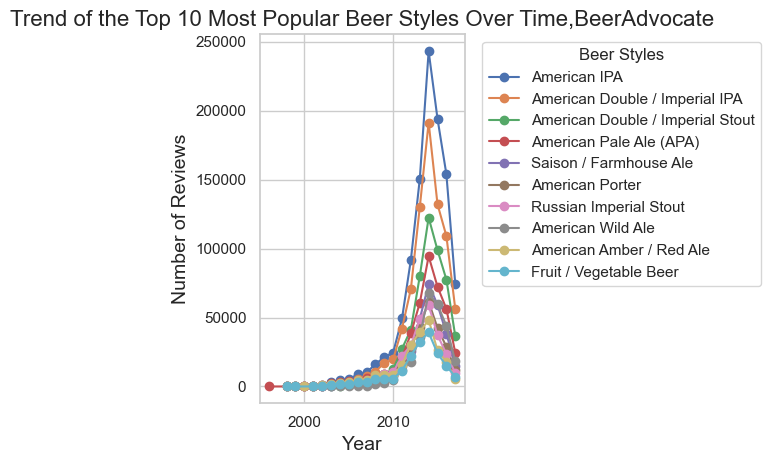

In [161]:
import pandas as pd
import matplotlib.pyplot as plt

style_review_count_ba = total_ba.groupby(['year', 'style']).size().reset_index(name='review_count')

style_avg_ratings_ba = total_ba.groupby(['year', 'style'])['rating'].mean().reset_index(name='average_rating')

most_reviewed_style_idx_ba = style_review_count_ba.groupby('year')['review_count'].idxmax()
most_reviewed_style_ba = style_review_count_ba.loc[most_reviewed_style_idx_ba]

style_analysis_ba = pd.merge(most_reviewed_style_ba, style_avg_ratings_ba, on=['year', 'style'], how='left')

top_10_styles_ba = style_review_count_ba.groupby('style')['review_count'].sum().nlargest(10).index

# Filter the dataframe to include only the top 10 most popular styles
top_styles_data_ba = style_review_count_ba[style_review_count_ba['style'].isin(top_10_styles_ba)]

# Plot data for each of the 10 most popular styles
for style in top_10_styles_ba:
    style_data_ba = top_styles_data_ba[top_styles_data_ba['style'] == style]
    plt.plot(style_data_ba['year'], style_data_ba['review_count'], label=style, marker='o')

# Add title, labels, and legend
plt.title('Trend of the Top 10 Most Popular Beer Styles Over Time,BeerAdvocate', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Reviews', fontsize=14)
plt.legend(title="Beer Styles", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Add layout to prevent cutting off titles
plt.tight_layout()

# Display the plot
plt.show()



In [167]:
# Group reviews by style, year, and user location, then count the number of reviews for each combination
review_counts_fl_ba = total_ba.groupby(['style', 'year', 'location_user']).size().reset_index(name='review_count')

# Merge the reviews with their review counts based on style, year, and user location
reviews_with_counts_fl_ba= pd.merge(total_ba, review_counts_fl_ba, on=['style', 'year', 'location_user'])

# Filter the reviews to include only those with at least 5 reviews
filtered_reviews_fl_ba = reviews_with_counts_fl_ba[reviews_with_counts_fl_ba['review_count'] >= 5]

# Calculate the weighted average rating for each beer style and user location
weighted_avg_styles_location_ba = filtered_reviews_fl_ba.groupby(['style', 'location_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')

# Sort by weighted average rating
weighted_avg_styles_location_ba = weighted_avg_styles_location_ba.sort_values('weighted_avg_rating', ascending=False)

# Encode beer styles as numbers to calculate correlation
weighted_avg_styles_location_ba['style_code'] = pd.factorize(weighted_avg_styles_location_ba['style'])[0]

# Encode user location as numbers for correlation
weighted_avg_styles_location_ba['location_user_code'] = pd.factorize(weighted_avg_styles_location_ba['location_user'])[0]

# Calculate the correlation between "style_code", "location_user_code", and "weighted_avg_rating"
correlation_style_location_ba = weighted_avg_styles_location_ba[['style_code', 'location_user_code', 'weighted_avg_rating']].corr()

# Display the correlation matrix
print("Correlation between style, location, and weighted average rating, BeerAdvocate:")
print(correlation_style_location_ba)


Correlation between style, location, and weighted average rating, BeerAdvocate:
                     style_code  location_user_code  weighted_avg_rating
style_code             1.000000            0.116121            -0.654770
location_user_code     0.116121            1.000000            -0.186291
weighted_avg_rating   -0.654770           -0.186291             1.000000


/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_51833/2130574251.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_styles_location_ba = filtered_reviews_fl_ba.groupby(['style', 'location_user']).apply(


Correlation between year and weighted average rating, Beeradvocate:
                         year  weighted_avg_rating
year                 1.000000             0.497074
weighted_avg_rating  0.497074             1.000000


/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_51833/2290707052.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_year_ba = filtered_reviews_y_ba.groupby('year').apply(


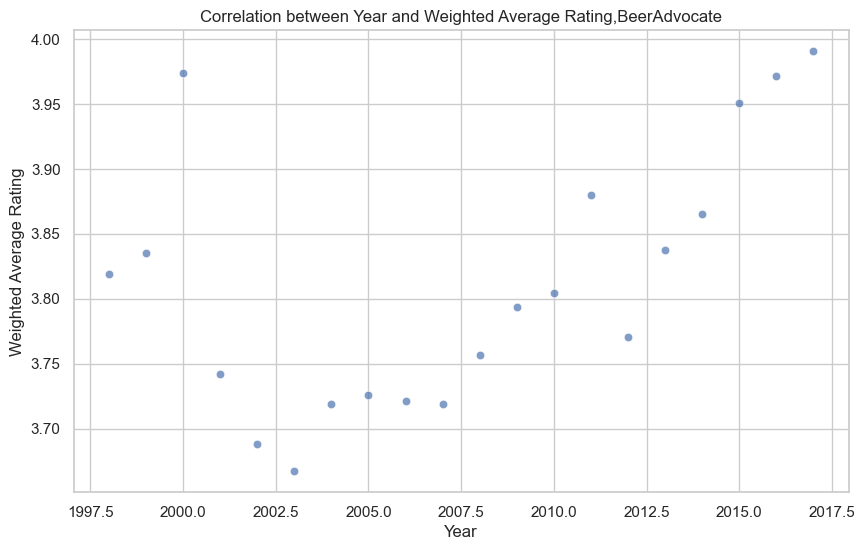

In [171]:
# Group data by year and calculate the total number of reviews per year
review_counts_y_ba = total_ba.groupby(['year']).size().reset_index(name='review_count')

# Merge the reviews data with the review count data based on the year
reviews_with_counts_y_ba= pd.merge(total_ba, review_counts_y_ba, on=['year'])

# Filter reviews where the review count per year is greater than or equal to 5
filtered_reviews_y_ba = reviews_with_counts_y_ba[reviews_with_counts_y_ba['review_count'] >= 5]

# Calculate the weighted average rating per year
weighted_avg_year_ba = filtered_reviews_y_ba.groupby('year').apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')

# Calculate the correlation between the year and the weighted average rating
correlation_year_score_ba = weighted_avg_year_ba[['year', 'weighted_avg_rating']].corr()

# Display the correlation matrix
print("Correlation between year and weighted average rating, Beeradvocate:")
print(correlation_year_score_ba)

# Display a scatter plot to better understand the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weighted_avg_year_ba, x='year', y='weighted_avg_rating', alpha=0.7)
plt.title('Correlation between Year and Weighted Average Rating,BeerAdvocate')
plt.xlabel('Year')
plt.ylabel('Weighted Average Rating')
plt.grid(True)
plt.show()


Correlation between year, Location of the user and weighted average rating, BeerAdvocate:
                         year  location_user_code  weighted_avg_rating
year                 1.000000            0.455989             0.212352
location_user_code   0.455989            1.000000             0.060128
weighted_avg_rating  0.212352            0.060128             1.000000


/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_51833/2940465813.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_year_ba = filtered_reviews_y_ba.groupby(['year', 'location_user']).apply(


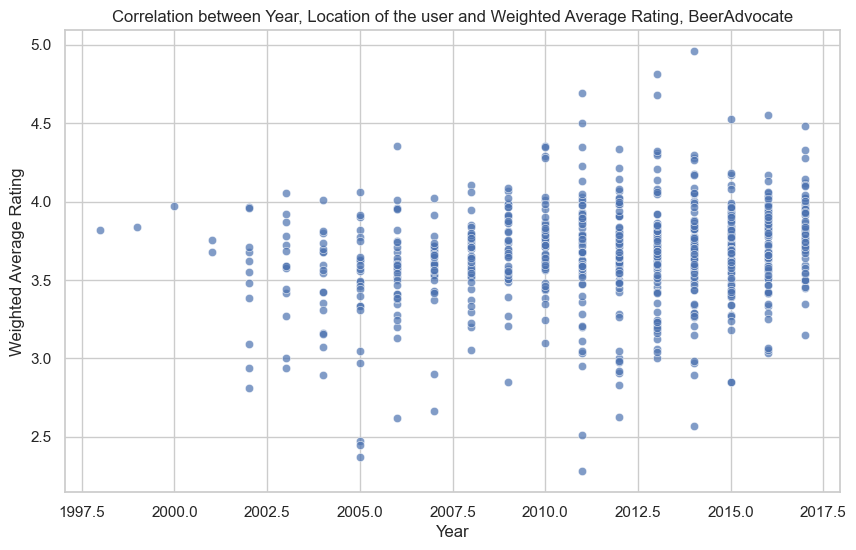

In [175]:
# Group data by year and location, and count the number of reviews for each combination
review_counts_y_ba = total_ba.groupby(['year', 'location_user']).size().reset_index(name='review_count')

# Merge the reviews data with the review count data based on the year and location_user
reviews_with_counts_y_ba = pd.merge(total_ba, review_counts_y_ba, on=['year', 'location_user'])

# Filter reviews where the review count per year and location is greater than or equal to 5
filtered_reviews_y_ba = reviews_with_counts_y_ba[reviews_with_counts_y_ba['review_count'] >= 5]

# Calculate the weighted average rating per year and location_user
weighted_avg_year_ba = filtered_reviews_y_ba.groupby(['year', 'location_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')

# Encode location_user as a numerical code for correlation calculation
weighted_avg_year_ba['location_user_code'] = pd.factorize(weighted_avg_year_ba['location_user'])[0]

# Calculate the correlation between year, location_user_code, and weighted average rating
correlation_year_score_ba = weighted_avg_year_ba[['year', 'location_user_code', 'weighted_avg_rating']].corr()

# Display the correlation matrix
print("Correlation between year, Location of the user and weighted average rating, BeerAdvocate:")
print(correlation_year_score_ba)

# Display a scatter plot to better understand the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weighted_avg_year_ba, x='year', y='weighted_avg_rating', alpha=0.7)
plt.title('Correlation between Year, Location of the user and Weighted Average Rating, BeerAdvocate')
plt.xlabel('Year')
plt.ylabel('Weighted Average Rating')
plt.grid(True)
plt.show()


Correlation between year,location of the user, style and weighted average rating, BeerAdvocate:
                         year  location_user_code  weighted_avg_rating  \
year                 1.000000            0.375252             0.098251   
location_user_code   0.375252            1.000000             0.047813   
weighted_avg_rating  0.098251            0.047813             1.000000   
style_code           0.000295           -0.138212             0.071533   

                     style_code  
year                   0.000295  
location_user_code    -0.138212  
weighted_avg_rating    0.071533  
style_code             1.000000  


/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_51833/2077315351.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_year_ba = filtered_reviews_y_ba.groupby(['year','style', 'location_user']).apply(


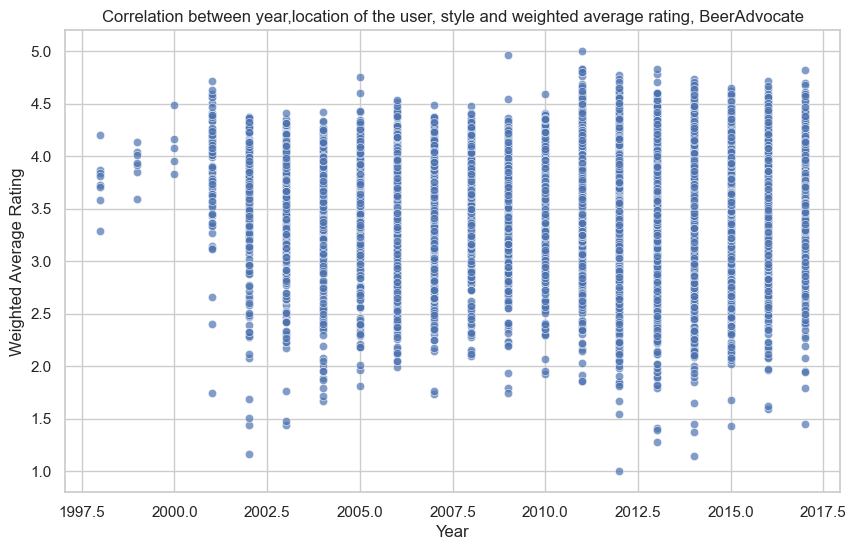

In [183]:
# Group data by year and location, and count the number of reviews for each combination
review_counts_y_ba = total_ba.groupby(['year', 'location_user','style']).size().reset_index(name='review_count')

# Merge the reviews data with the review count data based on the year and location_user
reviews_with_counts_y_ba= pd.merge(total_ba, review_counts_y_ba, on=['year', 'location_user','style'])

# Filter reviews where the review count per year and location is greater than or equal to 5
filtered_reviews_y_ba = reviews_with_counts_y_ba[reviews_with_counts_y_ba['review_count'] >= 5]

# Calculate the weighted average rating per year and location_user
weighted_avg_year_ba = filtered_reviews_y_ba.groupby(['year','style', 'location_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')

# Encode location_user as a numerical code for correlation calculation
weighted_avg_year_ba['location_user_code'] = pd.factorize(weighted_avg_year_ba['location_user'])[0]
weighted_avg_year_ba['style_code'] = pd.factorize(weighted_avg_year_ba['style'])[0]

# Calculate the correlation between year, location_user_code, and weighted average rating
correlation_year_score_ba= weighted_avg_year_ba[['year', 'location_user_code', 'weighted_avg_rating','style_code']].corr()

# Display the correlation matrix
print("Correlation between year,location of the user, style and weighted average rating, BeerAdvocate:")
print(correlation_year_score_ba)

# Display a scatter plot to better understand the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weighted_avg_year_ba, x='year', y='weighted_avg_rating', alpha=0.7)
plt.title('Correlation between year,location of the user, style and weighted average rating, BeerAdvocate')
plt.xlabel('Year')
plt.ylabel('Weighted Average Rating')
plt.grid(True)
plt.show()


Correlation between abv and weighted average rating, BeerAdvocate:
                          abv  weighted_avg_rating
abv                  1.000000             0.391163
weighted_avg_rating  0.391163             1.000000


/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_51833/664218461.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_abv_ba = filtered_reviews_abv_ba.groupby(['abv']).apply(


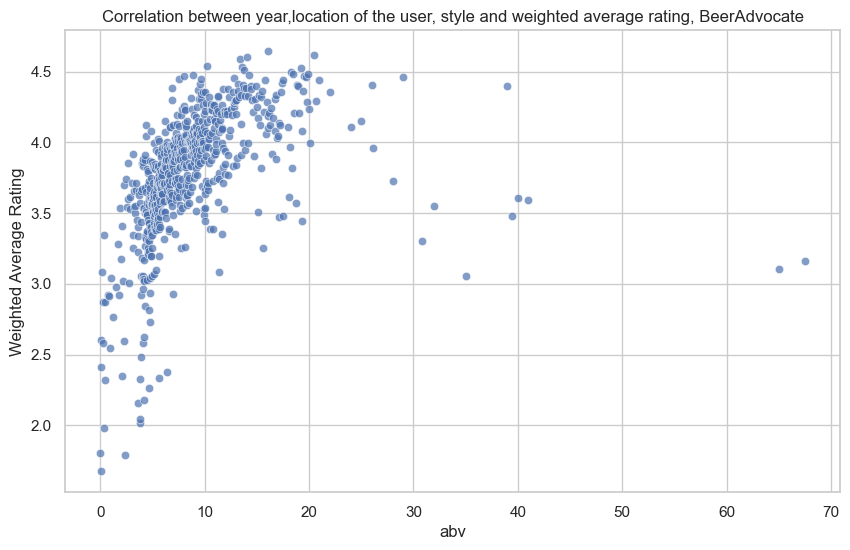

In [189]:
review_counts_abv_ba = total_ba.groupby(['abv']).size().reset_index(name='review_count')

# Merge the reviews data with the review count data based on the year and location_user
reviews_with_counts_abv_ba = pd.merge(total_ba, review_counts_abv_ba, on=['abv'])

# Filter reviews where the review count per year and location is greater than or equal to 5
filtered_reviews_abv_ba = reviews_with_counts_abv_ba[reviews_with_counts_abv_ba['review_count'] >= 5]

# Calculate the weighted average rating per year and location_user
weighted_avg_abv_ba = filtered_reviews_abv_ba.groupby(['abv']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')


# Calculate the correlation between year, location_user_code, and weighted average rating
correlation_score_ba = weighted_avg_abv_ba[['abv', 'weighted_avg_rating']].corr()

# Display the correlation matrix
print("Correlation between abv and weighted average rating, BeerAdvocate:")
print(correlation_score_ba)

# Display a scatter plot to better understand the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weighted_avg_abv_ba, x='abv', y='weighted_avg_rating', alpha=0.7)
plt.title('Correlation between year,location of the user, style and weighted average rating, BeerAdvocate')
plt.xlabel('abv')
plt.ylabel('Weighted Average Rating')
plt.grid(True)
plt.show()